In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Load dataset
file_path = 'realtor-data.zip.csv'
df = pd.read_csv(file_path, dtype={'zip_code': str})

print("Shape of dataset:", df.shape)
df.head()


Shape of dataset: (2226382, 12)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,00601,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,00601,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,00795,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,00731,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,00680,NaN,NaN


In [ ]:
print(df['state'].unique())

['Puerto Rico' 'Virgin Islands' 'Massachusetts' 'Connecticut'
 'New Hampshire' 'Vermont' 'New Jersey' 'New York' 'South Carolina'
 'Tennessee' 'Rhode Island' 'Virginia' 'Wyoming' 'Maine' 'Georgia'
 'Pennsylvania' 'West Virginia' 'Delaware' 'Louisiana' 'Ohio' 'California'
 'Colorado' 'Maryland' 'Missouri' 'District of Columbia' 'Wisconsin'
 'North Carolina' 'Kentucky' 'Michigan' 'Mississippi' 'Florida' 'Alabama'
 'New Brunswick' nan 'Texas' 'Arkansas' 'Idaho' 'Indiana' 'Illinois'
 'New Mexico' 'Iowa' 'Minnesota' 'South Dakota' 'Nebraska' 'North Dakota'
 'Montana' 'Oklahoma' 'Kansas' 'Oregon' 'Utah' 'Nevada' 'Washington'
 'Arizona' 'Hawaii' 'Guam' 'Alaska']


In [ ]:
missing = df.isnull().sum()
print(missing)
print(len(df))

brokered_by         4533
status                 0
price               1541
bed               481317
bath              511771
acre_lot          325589
street             10866
city                1407
state                  8
zip_code             299
house_size        568484
prev_sold_date    734297
dtype: int64
2226382


In [ ]:
df = df.dropna(subset=['prev_sold_date', 'price', 'house_size', 'zip_code'])
# Convert 'prev_sold_date' to datetime
df['prev_sold_date'] = pd.to_datetime(df['prev_sold_date'], errors='coerce')
# Drop rows where 'prev_sold_date' is NaT after conversion
missing = df.isnull().sum()
print(missing)

brokered_by         2226
status                 0
price                  0
bed                13966
bath               13623
acre_lot          164426
street              4154
city                 158
state                  0
zip_code               0
house_size             0
prev_sold_date         1
dtype: int64


In [ ]:
df = df.dropna(subset=['prev_sold_date'])

In [ ]:
df['year'] = df['prev_sold_date'].dt.year
df['quarter'] = df['prev_sold_date'].dt.quarter
df['month'] = df['prev_sold_date'].dt.month

# Display the first few rows to see the new columns
display(df.head())
print(len(df))

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year,quarter,month
411,52270.0,for_sale,76900.0,3.0,2.0,NaN,1873083.0,Canovanas,Puerto Rico,00729,1200.0,2020-02-28,2020,1,2
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,00949,1192.0,2019-06-28,2019,2,6
1025,52707.0,for_sale,159000.0,3.0,2.0,NaN,1657337.0,Caguas,Puerto Rico,00725,1625.0,2021-09-15,2021,3,9
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,00802,5000.0,2013-10-11,2013,4,10
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,00802,4600.0,2018-04-05,2018,2,4


1268756


In [ ]:
'''import pandas as pd
import requests
import os

df["zip_code"] = df["zip_code"].astype(str).str.strip()

# File cache tọa độ
cache_file = "usa_latlon.csv"

# Đọc file cache nếu có
if os.path.exists(cache_file):
    cache_df = pd.read_csv(cache_file)
else:
    cache_df = pd.DataFrame(columns=["zip_code", "latitude", "longitude"])

# API call function
def get_lat_lon(zip_code):
    url = f"http://api.zippopotam.us/us/{zip_code}"
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        lat = data['places'][0]['latitude']
        lon = data['places'][0]['longitude']
        return float(lat), float(lon)
    else:
        return None, None

# Duyệt qua từng zip code trong dataset
new_rows = []
for z in df["zip_code"].unique():
    if z not in cache_df["zip_code"].astype(str).values:
        lat, lon = get_lat_lon(z)
        if lat is not None and lon is not None:
            new_rows.append({"zip_code": z, "latitude": lat, "longitude": lon})

# Cập nhật cache
if new_rows:
    cache_df = pd.concat([cache_df, pd.DataFrame(new_rows)], ignore_index=True)
    cache_df.to_csv(cache_file, index=False)

print("Cập nhật tọa độ hoàn tất.")
'''

'import pandas as pd\nimport requests\nimport os\n\ndf["zip_code"] = df["zip_code"].astype(str).str.strip()\n\n# File cache tọa độ\ncache_file = "usa_latlon.csv"\n\n# Đọc file cache nếu có\nif os.path.exists(cache_file):\n    cache_df = pd.read_csv(cache_file)\nelse:\n    cache_df = pd.DataFrame(columns=["zip_code", "latitude", "longitude"])\n\n# API call function\ndef get_lat_lon(zip_code):\n    url = f"http://api.zippopotam.us/us/{zip_code}"\n    response = requests.get(url)\n    if response.status_code == 200:\n        data = response.json()\n        lat = data[\'places\'][0][\'latitude\']\n        lon = data[\'places\'][0][\'longitude\']\n        return float(lat), float(lon)\n    else:\n        return None, None\n\n# Duyệt qua từng zip code trong dataset\nnew_rows = []\nfor z in df["zip_code"].unique():\n    if z not in cache_df["zip_code"].astype(str).values:\n        lat, lon = get_lat_lon(z)\n        if lat is not None and lon is not None:\n            new_rows.append({"zip_cod

In [ ]:
'''zip_lat_lon = pd.read_csv("usa_latlon.csv")

# Đảm bảo zip_code cùng kiểu dữ liệu (tránh lỗi merge)
df["zip_code"] = df["zip_code"].astype(str)
zip_lat_lon["zip_code"] = zip_lat_lon["zip_code"].astype(str)

# Chỉ giữ lại zip_code, latitude, longitude
zip_lat_lon = zip_lat_lon[["zip_code", "latitude", "longitude"]]

# Merge để thêm 2 cột latitude và longitude
df = df.merge(zip_lat_lon, on="zip_code", how="left")

# Kiểm tra
print(df.head())'''

'zip_lat_lon = pd.read_csv("usa_latlon.csv")\n\n# Đảm bảo zip_code cùng kiểu dữ liệu (tránh lỗi merge)\ndf["zip_code"] = df["zip_code"].astype(str)\nzip_lat_lon["zip_code"] = zip_lat_lon["zip_code"].astype(str)\n\n# Chỉ giữ lại zip_code, latitude, longitude\nzip_lat_lon = zip_lat_lon[["zip_code", "latitude", "longitude"]]\n\n# Merge để thêm 2 cột latitude và longitude\ndf = df.merge(zip_lat_lon, on="zip_code", how="left")\n\n# Kiểm tra\nprint(df.head())'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1268756 entries, 411 to 2226381
Data columns (total 15 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   brokered_by     1266530 non-null  float64       
 1   status          1268756 non-null  object        
 2   price           1268756 non-null  float64       
 3   bed             1254790 non-null  float64       
 4   bath            1255133 non-null  float64       
 5   acre_lot        1104331 non-null  float64       
 6   street          1264602 non-null  float64       
 7   city            1268598 non-null  object        
 8   state           1268756 non-null  object        
 9   zip_code        1268756 non-null  object        
 10  house_size      1268756 non-null  float64       
 11  prev_sold_date  1268756 non-null  datetime64[ns]
 12  year            1268756 non-null  int32         
 13  quarter         1268756 non-null  int32         
 14  month           12687

In [ ]:
df.describe()

,brokered_by,price,bed,bath,acre_lot,street,house_size,prev_sold_date,year,quarter,month
count,1.266530e+06,1.268756e+06,1.254790e+06,1.255133e+06,1.104331e+06,1.264602e+06,1.268756e+06,1268756,1.268756e+06,1.268756e+06,1.268756e+06
mean,5.321065e+04,5.677642e+05,3.249272e+00,2.469865e+00,1.196601e+01,9.282866e+05,2.021691e+03,2017-11-10 09:54:45.363615232,2.017406e+03,2.319257e+00,5.959186e+00
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,3.300000e+01,4.000000e+00,1901-01-01 00:00:00,1.901000e+03,1.000000e+00,1.000000e+00
25%,2.368100e+04,2.350000e+05,3.000000e+00,2.000000e+00,1.400000e-01,4.680502e+05,1.280000e+03,2017-02-14 00:00:00,2.017000e+03,1.000000e+00,3.000000e+00
50%,5.296100e+04,3.750000e+05,3.000000e+00,2.000000e+00,2.100000e-01,9.304735e+05,1.723000e+03,2021-12-03 00:00:00,2.021000e+03,2.000000e+00,4.000000e+00
75%,7.920200e+04,5.999000e+05,4.000000e+00,3.000000e+00,4.100000e-01,1.387845e+06,2.365000e+03,2022-03-04 00:00:00,2.022000e+03,4.000000e+00,1.000000e+01
max,1.101420e+05,8.750000e+08,4.440000e+02,4.600000e+02,1.000000e+05,2.001125e+06,1.299220e+07,2026-04-08 00:00:00,2.026000e+03,4.000000e+00,1.200000e+01
std,3.056497e+04,1.419218e+06,1.399963e+00,1.342469e+00,7.925339e+02,5.300172e+05,1.235080e+04,NaN,7.966999e+00,1.213728e+00,3.810268e+00


In [ ]:
missing = df.isnull().sum()
missing

,0
brokered_by,2226
status,0
price,0
bed,13966
bath,13623
acre_lot,164425
street,4154
city,158
state,0
zip_code,0


In [ ]:
len(df)

1268756

In [ ]:
df['quarter'].unique()

array([1, 2, 3, 4], dtype=int32)

In [ ]:
demo = df[(df['quarter']==4)]
print(len(demo))

352447


In [ ]:
df = df[(df['price'] > 0)]

# Convert house_size, acre_lot to numeric (again for safety)
df['house_size'] = pd.to_numeric(df['house_size'], errors='coerce')
df['acre_lot'] = pd.to_numeric(df['acre_lot'], errors='coerce')
df['zip_code'] = df['zip_code'].astype(str).str.zfill(5)

# Tách ZIP prefix và suffix
df['zip_prefix'] = df['zip_code'].str[:3]   # 3 số đầu
df['zip_suffix'] = df['zip_code'].str[3:]   # 2 số cuối

# Final check
print("New shape after cleaning:", df.shape)
print(df.isnull().sum())


New shape after cleaning: (1268755, 17)
brokered_by         2226
status                 0
price                  0
bed                13966
bath               13623
acre_lot          164424
street              4154
city                 158
state                  0
zip_code               0
house_size             0
prev_sold_date         0
year                   0
quarter                0
month                  0
zip_prefix             0
zip_suffix             0
dtype: int64


zip_prefix → 3 số đầu (vùng SCF – Sectional Center Facility)

zip_suffix → 2 số cuối (local area trong vùng SCF)

In [ ]:
df

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year,quarter,month,zip_prefix,zip_suffix
411,52270.0,for_sale,76900.0,3.0,2.0,NaN,1873083.0,Canovanas,Puerto Rico,00729,1200.0,2020-02-28,2020,1,2,007,29
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,00949,1192.0,2019-06-28,2019,2,6,009,49
1025,52707.0,for_sale,159000.0,3.0,2.0,NaN,1657337.0,Caguas,Puerto Rico,00725,1625.0,2021-09-15,2021,3,9,007,25
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,00802,5000.0,2013-10-11,2013,4,10,008,02
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,00802,4600.0,2018-04-05,2018,2,4,008,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2226377,23009.0,sold,359900.0,4.0,2.0,0.33,353094.0,Richland,Washington,99354,3600.0,2022-03-25,2022,1,3,993,54
2226378,18208.0,sold,350000.0,3.0,2.0,0.10,1062149.0,Richland,Washington,99354,1616.0,2022-03-25,2022,1,3,993,54
2226379,76856.0,sold,440000.0,6.0,3.0,0.50,405677.0,Richland,Washington,99354,3200.0,2022-03-24,2022,1,3,993,54
2226380,53618.0,sold,179900.0,2.0,1.0,0.09,761379.0,Richland,Washington,99354,933.0,2022-03-24,2022,1,3,993,54


In [ ]:
# Sort the DataFrame by 'price' in descending order and display the top properties
df_highest_price = df.sort_values(by='price', ascending=False)
display(df_highest_price.head())

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year,quarter,month,zip_prefix,zip_suffix
72903,100472.0,for_sale,875000000.0,9.0,2.0,NaN,1811391.0,Bronx,New York,10458,2440.0,2002-12-30,2002,4,12,104,58
1288464,13872.0,for_sale,515000000.0,2.0,2.0,2.59,1658312.0,San Diego,California,92119,1048.0,2018-04-17,2018,2,4,921,19
1258584,43753.0,for_sale,165000000.0,14.0,27.0,4.60,1442774.0,Los Angeles,California,90024,56500.0,2019-07-02,2019,3,7,900,24
1307430,98034.0,for_sale,160000000.0,10.0,21.0,22.00,867426.0,Carpinteria,California,93013,14189.0,2007-02-28,2007,1,2,930,13
490791,8061.0,for_sale,150000000.0,12.0,21.0,4.19,937496.0,Miami,Florida,33129,19919.0,1996-06-24,1996,2,6,331,29


In [ ]:
df['bed_bath_difference'] = df['bed'] - df['bath']
print(len(df['bed_bath_difference']))
display(df.head())

1268755


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year,quarter,month,zip_prefix,zip_suffix,bed_bath_difference
411,52270.0,for_sale,76900.0,3.0,2.0,NaN,1873083.0,Canovanas,Puerto Rico,00729,1200.0,2020-02-28,2020,1,2,007,29,1.0
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,00949,1192.0,2019-06-28,2019,2,6,009,49,4.0
1025,52707.0,for_sale,159000.0,3.0,2.0,NaN,1657337.0,Caguas,Puerto Rico,00725,1625.0,2021-09-15,2021,3,9,007,25,1.0
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,00802,5000.0,2013-10-11,2013,4,10,008,02,1.0
2277,103341.0,for_sale,6899000.0,4.0,6.0,0.83,17467.0,Saint Thomas,Virgin Islands,00802,4600.0,2018-04-05,2018,2,4,008,02,-2.0


In [ ]:
df_bed_bath_less_than_minus2 = df[df['bed_bath_difference'] < -2]
display(df_bed_bath_less_than_minus2.head())
print(len(df_bed_bath_less_than_minus2))

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year,quarter,month,zip_prefix,zip_suffix,bed_bath_difference
4166,107912.0,for_sale,2995000.0,4.0,8.0,12.10,544847.0,Worthington,Massachusetts,01098,14240.0,2001-10-05,2001,4,10,010,98,-4.0
5180,107912.0,for_sale,3850000.0,5.0,8.0,9.07,1297509.0,Farmington,Connecticut,06032,10823.0,1999-02-01,1999,1,2,060,32,-3.0
5183,107912.0,for_sale,1250000.0,4.0,7.0,2.25,956807.0,Avon,Connecticut,06001,7422.0,1988-06-06,1988,2,6,060,01,-3.0
5249,74001.0,for_sale,579900.0,1.0,4.0,4.20,176168.0,Williamstown,Massachusetts,01267,9800.0,1992-09-30,1992,3,9,012,67,-3.0
5428,22611.0,for_sale,2849900.0,6.0,9.0,4.64,115651.0,Avon,Connecticut,06001,9700.0,2009-06-01,2009,2,6,060,01,-3.0


3061


In [ ]:
df_bed_bath_more_than_minus1= df[df['bed_bath_difference'] >= -1]
len(df_bed_bath_more_than_minus1)

1238753

In [ ]:
#df = df[(df['bed_bath_difference'] >= -1) | (df['bed_bath_difference'].isna())]
#print(len(df['bed_bath_difference']))

In [ ]:
# Calculate the first quartile (Q1) and third quartile (Q3) for the 'price' column
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the lower and upper bounds for outlier detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print the number of rows before removing outliers
print("Shape of DataFrame before removing outliers:", df.shape)
# Calculate the number of rows below the lower bound
removed_lower = df[df['price'] < lower_bound].shape[0]

# Calculate the number of rows above the upper bound
removed_upper = df[df['price'] > upper_bound].shape[0]

print(f"Number of rows removed below the lower bound: {removed_lower}")
print(f"Number of rows removed above the upper bound: {removed_upper}")

# Filter out the outliers from the 'price' column
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy()

# Print the number of rows after removing outliers
print("Shape of DataFrame after removing outliers:", df.shape)

# Display the first few rows of the filtered DataFrame
display(df.head())

Shape of DataFrame before removing outliers: (1268755, 18)
Number of rows removed below the lower bound: 0
Number of rows removed above the upper bound: 104445
Shape of DataFrame after removing outliers: (1164310, 18)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year,quarter,month,zip_prefix,zip_suffix,bed_bath_difference
411,52270.0,for_sale,76900.0,3.0,2.0,NaN,1873083.0,Canovanas,Puerto Rico,00729,1200.0,2020-02-28,2020,1,2,007,29,1.0
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,00949,1192.0,2019-06-28,2019,2,6,009,49,4.0
1025,52707.0,for_sale,159000.0,3.0,2.0,NaN,1657337.0,Caguas,Puerto Rico,00725,1625.0,2021-09-15,2021,3,9,007,25,1.0
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,00802,5000.0,2013-10-11,2013,4,10,008,02,1.0
3231,18211.0,for_sale,73400.0,3.0,1.0,NaN,1988454.0,Toa Baja,Puerto Rico,00949,950.0,2022-02-28,2022,1,2,009,49,2.0


In [ ]:
df[(df['year']<1970)]

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year,quarter,month,zip_prefix,zip_suffix,bed_bath_difference
7198,10588.0,for_sale,184900.0,3.0,2.0,0.38,175309.0,Putnam,Connecticut,06260,1697.0,1968-04-01,1968,2,4,062,60,1.0
8063,60033.0,for_sale,269000.0,4.0,2.0,0.16,894933.0,Lee,Massachusetts,01238,2260.0,1910-01-29,1910,1,1,012,38,2.0
8066,60033.0,for_sale,339000.0,3.0,2.0,0.17,1451500.0,Lee,Massachusetts,01238,1922.0,1901-01-01,1901,1,1,012,38,1.0
9529,50779.0,for_sale,353900.0,3.0,2.0,0.67,1427994.0,Berlin,Connecticut,06037,1642.0,1966-06-06,1966,2,6,060,37,1.0
9543,38768.0,for_sale,299900.0,4.0,2.0,0.28,1220711.0,Berlin,Connecticut,06037,1872.0,1966-03-09,1966,1,3,060,37,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1365659,55156.0,for_sale,465000.0,2.0,2.0,NaN,936332.0,Honolulu,Hawaii,96815,992.0,1969-10-01,1969,4,10,968,15,0.0
1387667,23062.0,for_sale,349500.0,2.0,1.0,0.50,1829551.0,Walla Walla,Washington,99362,1480.0,1965-06-01,1965,2,6,993,62,1.0
1396928,50393.0,for_sale,699000.0,3.0,3.0,0.46,1199817.0,Snohomish,Washington,98290,2612.0,1969-12-01,1969,4,12,982,90,0.0
1406006,79440.0,for_sale,225000.0,2.0,1.0,0.47,1790470.0,Okanogan,Washington,98840,1230.0,1962-11-13,1962,4,11,988,40,1.0


In [ ]:
df[#(df['house_size']<500) &
   (df['year']<1990) &
   (df['price']<30000)][['status','price','bed', 'bath', 'acre_lot', 'house_size','city', 'state', 'year']]

,status,price,bed,bath,acre_lot,house_size,city,state,year
93460,for_sale,25000.0,4.0,1.0,0.06,1422.0,Camden,New Jersey,1986
157133,for_sale,29900.0,2.0,NaN,0.05,1448.0,Erie,Pennsylvania,1987
157219,for_sale,20000.0,3.0,1.0,0.32,2495.0,Columbus,Pennsylvania,1988
159423,for_sale,23900.0,2.0,1.0,0.11,896.0,Charleroi,Pennsylvania,1979
160269,for_sale,11500.0,2.0,1.0,0.03,768.0,McKees Rocks,Pennsylvania,1988
...,...,...,...,...,...,...,...,...,...
1150187,for_sale,800.0,2.0,2.0,NaN,1144.0,Dillon,Colorado,1984
1150188,for_sale,800.0,2.0,2.0,NaN,1144.0,Dillon,Colorado,1983
1215963,for_sale,24000.0,2.0,1.0,0.15,720.0,Benson,Arizona,1988
1317136,for_sale,23500.0,2.0,1.0,0.32,1092.0,Trona,California,1977


In [ ]:
df = df[df['price']>=30000]

In [ ]:
len(df['zip_code'].unique())

24892

In [ ]:
df['price_per_sqft'] = df['price'] / df['house_size']

In [ ]:
df.sort_values(by='price_per_sqft', ascending=False).head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date,year,quarter,month,zip_prefix,zip_suffix,bed_bath_difference,price_per_sqft
1288464,13872.0,for_sale,515000000.0,2.0,2.0,2.59,1658312.0,San Diego,California,92119,1048.0,2018-04-17,2018,2,4,921,19,0.0,491412.213740
129837,98430.0,for_sale,1850000.0,4.0,4.0,NaN,699459.0,Laurel,New York,11948,4.0,2016-02-10,2016,1,2,119,48,0.0,462500.000000
72903,100472.0,for_sale,875000000.0,9.0,2.0,NaN,1811391.0,Bronx,New York,10458,2440.0,2002-12-30,2002,4,12,104,58,7.0,358606.557377
2064065,43753.0,sold,95000000.0,NaN,NaN,120.00,362431.0,Beverly Hills,California,90210,741.0,2021-12-30,2021,4,12,902,10,NaN,128205.128205
1307450,16829.0,for_sale,109000000.0,3.0,4.0,4.21,904983.0,Carpinteria,California,93013,2514.0,2002-08-01,2002,3,8,930,13,-1.0,43357.199682


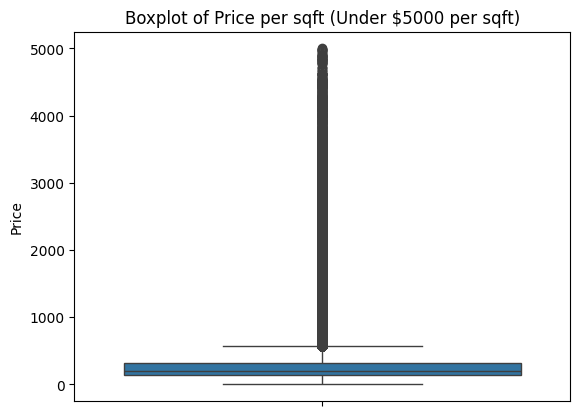

In [ ]:
sns.boxplot(y=df[df['price_per_sqft'] < 5000]['price_per_sqft'])
plt.title('Boxplot of Price per sqft (Under $5000 per sqft)')
plt.ylabel('Price')
plt.show()

In [ ]:
len(df[df['price_per_sqft'] < 50]['price_per_sqft'])

19738

In [ ]:
len(df[df['price_per_sqft'] < 1000]['price_per_sqft'])

1155979

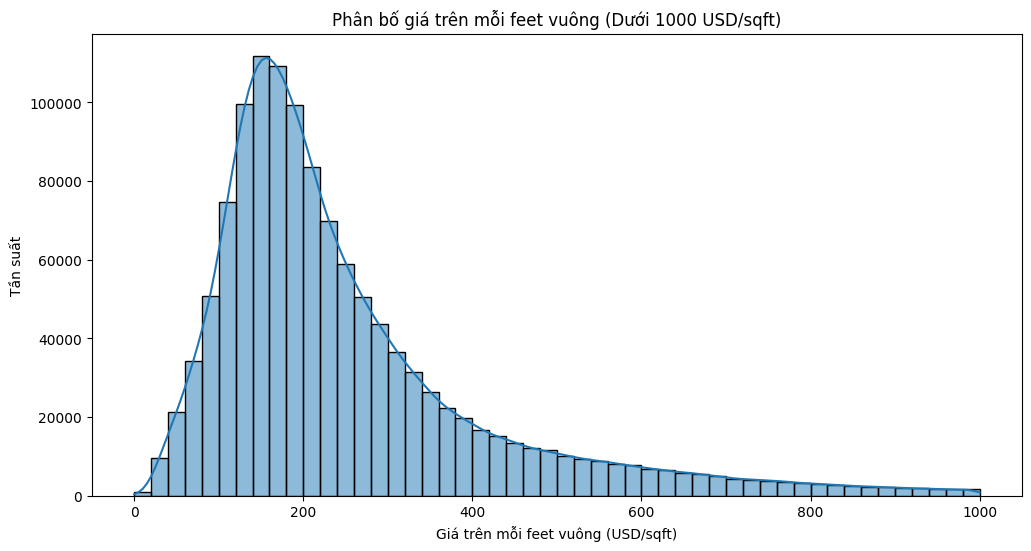

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['price_per_sqft'] < 1000]['price_per_sqft'].dropna(), bins=50, kde=True) # Filter before plotting and drop NaN values
plt.title('Phân bố giá trên mỗi feet vuông (Dưới 1000 USD/sqft)')
plt.xlabel('Giá trên mỗi feet vuông (USD/sqft)')
plt.ylabel('Tần suất')
plt.show()

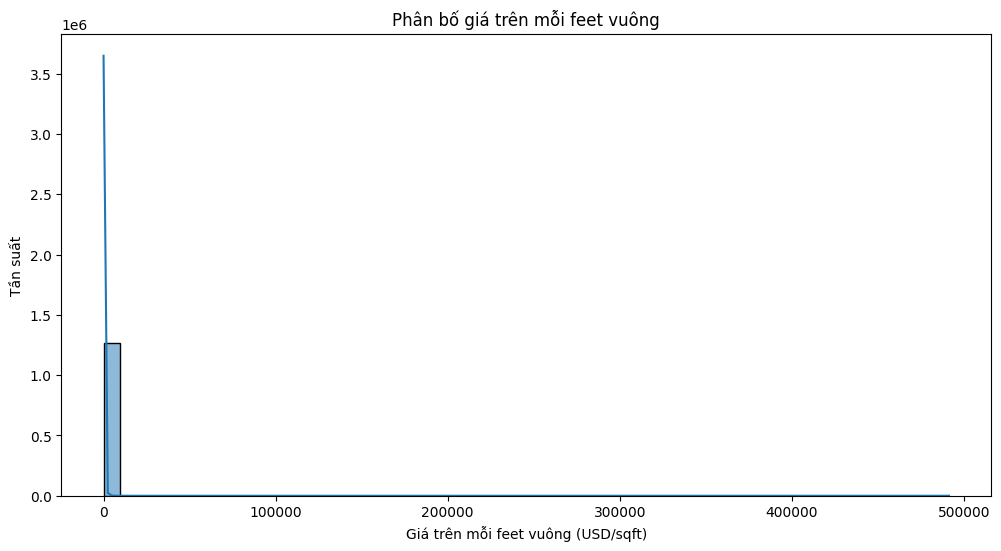

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df['price_per_sqft'].dropna(), bins=50, kde=True) # Drop NaN values for plotting
plt.title('Phân bố giá trên mỗi feet vuông')
plt.xlabel('Giá trên mỗi feet vuông (USD/sqft)')
plt.ylabel('Tần suất')
plt.show()

In [ ]:
df = df[(df['price_per_sqft'] < 1000) & (df['price_per_sqft'] > 50)]
print("Shape of DataFrame after removing outliers and keeping NaNs:", df.shape)

Shape of DataFrame after removing outliers and keeping NaNs: (1136110, 19)


In [ ]:
df['price_per_acre'] = df['price'] / df['acre_lot']

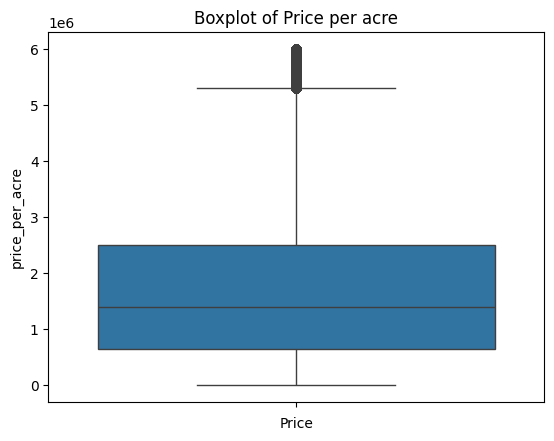

In [ ]:
# Avoid division by zero
sns.boxplot(y=df[df['price_per_acre'] < 6e6]['price_per_acre'])
plt.title('Boxplot of Price per acre')
plt.xlabel('Price')
plt.show()

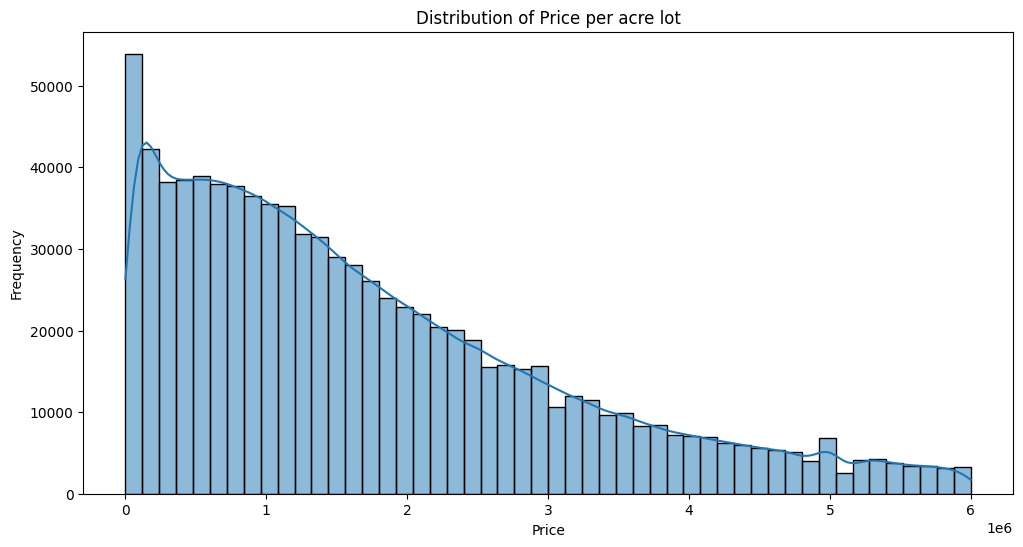

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(df[df['price_per_acre'] < 6e6]['price_per_acre'].dropna(), bins=50, kde=True) # Drop NaN values for plotting
plt.title('Distribution of Price per acre lot')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [ ]:
over_6e6= df[df['price_per_acre'] > 6e6]
print(len(over_6e6))

98353


In [ ]:
#df = df[(df['price_per_acre'] <= 2e7) | (df['price_per_acre'].isna())]
#len(df)

In [ ]:
#Tính giá trung bình theo ZIP prefix
average_price_by_zip_code = df.groupby('zip_code')['price'].mean().reset_index()

print("Giá trung bình theo ZIP prefix:")
display(average_price_by_zip_code)

Giá trung bình theo ZIP prefix:


,zip_code,price
0,00602,524900.000000
1,00603,132500.000000
2,00612,281250.000000
3,00623,154975.000000
4,00637,107500.000000
...,...,...
24455,99801,501374.285714
24456,99824,490000.000000
24457,99827,475000.000000
24458,99835,706214.285714


In [ ]:
# Tính giá trị trung bình của cột 'price_per_sqft'
mean_price_per_sqft = df['price_per_sqft'].mean()
std_price_per_sqft = df['price_per_sqft'].std()
median_price_per_sqft = df['price_per_sqft'].median()
print(f"Giá trị trung vị của cột price_per_sqft: {median_price_per_sqft:.2f}")
print(f"Giá trị trung bình của cột price_per_sqft: {mean_price_per_sqft:.2f}")
print(f"Độ lệch chuẩn của cột price_per_sqft: {std_price_per_sqft:.2f}")

Giá trị trung vị của cột price_per_sqft: 195.60
Giá trị trung bình của cột price_per_sqft: 234.57
Độ lệch chuẩn của cột price_per_sqft: 141.13


In [ ]:
median_price_per_sqft_by_zip_code = df.groupby('zip_code')['price_per_sqft'].median()

df['median_price_per_sqft_by_zip_code'] = df['zip_code'].map(median_price_per_sqft_by_zip_code)
print("Đã tạo cột 'median_price_per_sqft_zip_code' và gộp vào DataFrame chính.")
display(df.head())

Đã tạo cột 'median_price_per_sqft_zip_code' và gộp vào DataFrame chính.


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,...,prev_sold_date,year,quarter,month,zip_prefix,zip_suffix,bed_bath_difference,price_per_sqft,price_per_acre,median_price_per_sqft_by_zip_code
411,52270.0,for_sale,76900.0,3.0,2.0,NaN,1873083.0,Canovanas,Puerto Rico,00729,...,2020-02-28,2020,1,2,007,29,1.0,64.083333,NaN,75.497598
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,00949,...,2019-06-28,2019,2,6,009,49,4.0,92.281879,1.222222e+06,95.396523
1025,52707.0,for_sale,159000.0,3.0,2.0,NaN,1657337.0,Caguas,Puerto Rico,00725,...,2021-09-15,2021,3,9,007,25,1.0,97.846154,NaN,94.993532
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,00802,...,2013-10-11,2013,4,10,008,02,1.0,190.000000,9.595960e+05,190.000000
3231,18211.0,for_sale,73400.0,3.0,1.0,NaN,1988454.0,Toa Baja,Puerto Rico,00949,...,2022-02-28,2022,1,2,009,49,2.0,77.263158,NaN,95.396523


In [ ]:
mean_price_per_sqft_by_zip_code = df.groupby('zip_code')['price_per_sqft'].mean()

df['mean_price_per_sqft_by_zip_code'] = df['zip_code'].map(mean_price_per_sqft_by_zip_code)
print("Đã tạo cột 'mean_price_per_sqft_zip_code' và gộp vào DataFrame chính.")
display(df.head())

Đã tạo cột 'mean_price_per_sqft_zip_code' và gộp vào DataFrame chính.


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,...,year,quarter,month,zip_prefix,zip_suffix,bed_bath_difference,price_per_sqft,price_per_acre,median_price_per_sqft_by_zip_code,mean_price_per_sqft_by_zip_code
411,52270.0,for_sale,76900.0,3.0,2.0,NaN,1873083.0,Canovanas,Puerto Rico,00729,...,2020,1,2,007,29,1.0,64.083333,NaN,75.497598,94.906206
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,00949,...,2019,2,6,009,49,4.0,92.281879,1.222222e+06,95.396523,108.702416
1025,52707.0,for_sale,159000.0,3.0,2.0,NaN,1657337.0,Caguas,Puerto Rico,00725,...,2021,3,9,007,25,1.0,97.846154,NaN,94.993532,93.122290
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,00802,...,2013,4,10,008,02,1.0,190.000000,9.595960e+05,190.000000,190.000000
3231,18211.0,for_sale,73400.0,3.0,1.0,NaN,1988454.0,Toa Baja,Puerto Rico,00949,...,2022,1,2,009,49,2.0,77.263158,NaN,95.396523,108.702416


In [ ]:
median_price_per_sqft_by_city = df.groupby('city')['price_per_sqft'].median()

df['median_price_per_sqft_by_city'] = df['city'].map(median_price_per_sqft_by_city)
print("Đã tạo cột 'median_price_per_sqft_city' và gộp vào DataFrame chính.")
display(df.head())

Đã tạo cột 'median_price_per_sqft_city' và gộp vào DataFrame chính.


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,...,quarter,month,zip_prefix,zip_suffix,bed_bath_difference,price_per_sqft,price_per_acre,median_price_per_sqft_by_zip_code,mean_price_per_sqft_by_zip_code,median_price_per_sqft_by_city
411,52270.0,for_sale,76900.0,3.0,2.0,NaN,1873083.0,Canovanas,Puerto Rico,00729,...,1,2,007,29,1.0,64.083333,NaN,75.497598,94.906206,75.497598
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,00949,...,2,6,009,49,4.0,92.281879,1.222222e+06,95.396523,108.702416,206.667255
1025,52707.0,for_sale,159000.0,3.0,2.0,NaN,1657337.0,Caguas,Puerto Rico,00725,...,3,9,007,25,1.0,97.846154,NaN,94.993532,93.122290,95.576188
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,00802,...,4,10,008,02,1.0,190.000000,9.595960e+05,190.000000,190.000000,129.682997
3231,18211.0,for_sale,73400.0,3.0,1.0,NaN,1988454.0,Toa Baja,Puerto Rico,00949,...,1,2,009,49,2.0,77.263158,NaN,95.396523,108.702416,109.938434


In [ ]:
mean_price_per_sqft_by_city = df.groupby('city')['price_per_sqft'].mean()

df['mean_price_per_sqft_by_city'] = df['city'].map(mean_price_per_sqft_by_city)
print("Đã tạo cột 'mean_price_per_sqft_city' và gộp vào DataFrame chính.")
display(df.head())

Đã tạo cột 'mean_price_per_sqft_city' và gộp vào DataFrame chính.


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,...,month,zip_prefix,zip_suffix,bed_bath_difference,price_per_sqft,price_per_acre,median_price_per_sqft_by_zip_code,mean_price_per_sqft_by_zip_code,median_price_per_sqft_by_city,mean_price_per_sqft_by_city
411,52270.0,for_sale,76900.0,3.0,2.0,NaN,1873083.0,Canovanas,Puerto Rico,00729,...,2,007,29,1.0,64.083333,NaN,75.497598,94.906206,75.497598,94.906206
502,92147.0,for_sale,110000.0,7.0,3.0,0.09,1842706.0,Dorado,Puerto Rico,00949,...,6,009,49,4.0,92.281879,1.222222e+06,95.396523,108.702416,206.667255,206.667255
1025,52707.0,for_sale,159000.0,3.0,2.0,NaN,1657337.0,Caguas,Puerto Rico,00725,...,9,007,25,1.0,97.846154,NaN,94.993532,93.122290,95.576188,107.249028
2270,94933.0,for_sale,950000.0,5.0,4.0,0.99,1260473.0,Saint Thomas,Virgin Islands,00802,...,10,008,02,1.0,190.000000,9.595960e+05,190.000000,190.000000,129.682997,124.153166
3231,18211.0,for_sale,73400.0,3.0,1.0,NaN,1988454.0,Toa Baja,Puerto Rico,00949,...,2,009,49,2.0,77.263158,NaN,95.396523,108.702416,109.938434,117.365257


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder, FunctionTransformer, OrdinalEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

In [ ]:
missing_values_count = df.isnull().sum()
print("Số lượng giá trị bị thiếu ở mỗi cột:")
print(missing_values_count)

Số lượng giá trị bị thiếu ở mỗi cột:
brokered_by                            1954
status                                    0
price                                     0
bed                                    9991
bath                                   9356
acre_lot                             147226
street                                 3560
city                                    152
state                                     0
zip_code                                  0
house_size                                0
prev_sold_date                            0
year                                      0
quarter                                   0
month                                     0
zip_prefix                                0
zip_suffix                                0
bed_bath_difference                   12906
price_per_sqft                            0
price_per_acre                       147226
median_price_per_sqft_by_zip_code         0
mean_price_per_sqft_by_zip_code        

In [ ]:
X = df.drop('price', axis=1)
y = df['price']
print("Shape of DataFrame before splitting:", df.shape) # Add print statement to verify
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Data splitting complete.")
print("Shape of X_train", X_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of DataFrame before splitting: (1136110, 24)
Data splitting complete.
Shape of X_train (908888, 23)
Shape of X_test (227222, 23)
Shape of y_train: (908888,)
Shape of y_test: (227222,)


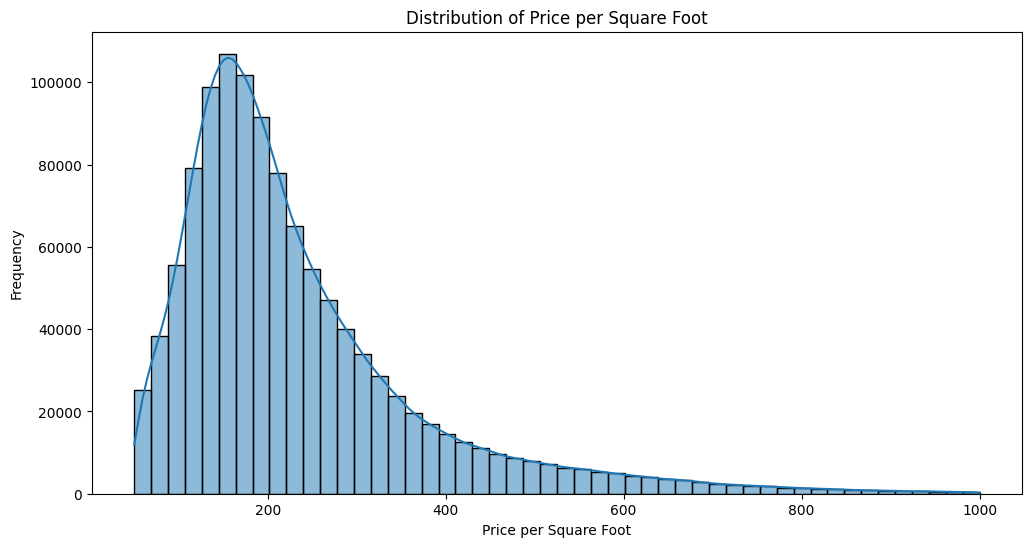

In [ ]:
df['price_per_sqft'] = df['price'] / df['house_size']
plt.figure(figsize=(12, 6))
sns.histplot(df['price_per_sqft'].dropna(), bins=50, kde=True) # Drop NaN values for plotting
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Tính giá trị trung bình của cột 'price_per_sqft'
mean_price_per_sqft_xtrain = X_train['price_per_sqft'].mean()
std_price_per_sqft_xtrain = X_train['price_per_sqft'].std()
median_price_per_sqft_xtrain = X_train['price_per_sqft'].median()
print(f"Giá trị trung vị của cột price_per_sqft: {median_price_per_sqft_xtrain:.2f}")
print(f"Giá trị trung bình của cột price_per_sqft: {mean_price_per_sqft_xtrain:.2f}")
print(f"Độ lệch chuẩn của cột price_per_sqft: {std_price_per_sqft_xtrain:.2f}")

Giá trị trung vị của cột price_per_sqft: 195.54
Giá trị trung bình của cột price_per_sqft: 234.59
Độ lệch chuẩn của cột price_per_sqft: 141.18


In [ ]:
# Tính giá trị trung bình của cột 'price_per_sqft'
mean_price_per_sqft_xtest = X_test['price_per_sqft'].mean()
std_price_per_sqft_xtest = X_test['price_per_sqft'].std()
median_price_per_sqft_xtest = X_test['price_per_sqft'].median()
print(f"Giá trị trung vị của cột price_per_sqft: {median_price_per_sqft_xtest:.2f}")
print(f"Giá trị trung bình của cột price_per_sqft: {mean_price_per_sqft_xtest:.2f}")
print(f"Độ lệch chuẩn của cột price_per_sqft: {std_price_per_sqft_xtest:.2f}")

Giá trị trung vị của cột price_per_sqft: 195.81
Giá trị trung bình của cột price_per_sqft: 234.48
Độ lệch chuẩn của cột price_per_sqft: 140.95


In [ ]:
df.columns

Index(['brokered_by', 'status', 'price', 'bed', 'bath', 'acre_lot', 'street',
       'city', 'state', 'zip_code', 'house_size', 'prev_sold_date', 'year',
       'quarter', 'month', 'zip_prefix', 'zip_suffix', 'bed_bath_difference',
       'price_per_sqft', 'price_per_acre', 'median_price_per_sqft_by_zip_code',
       'mean_price_per_sqft_by_zip_code', 'median_price_per_sqft_by_city',
       'mean_price_per_sqft_by_city'],
      dtype='object')

In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder
import pandas as pd

class LabelEncoderMulti(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.encoders = {}

    def fit(self, X, y=None):
        # Đảm bảo X là DataFrame
        X = pd.DataFrame(X)
        for col in X.columns:
            le = LabelEncoder()
            le.fit(X[col].astype(str))
            self.encoders[col] = le
        return self

    def transform(self, X):
        X = pd.DataFrame(X)
        X_trans = X.copy()
        for col in X.columns:
            le = self.encoders[col]
            # Encode giá trị, nếu giá trị mới -> gán mã -1
            X_trans[col] = X[col].astype(str).map(lambda s: le.transform([s])[0] if s in le.classes_ else -1)
        return X_trans

    def fit_transform(self, X, y=None):
        return self.fit(X, y).transform(X)


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd
import numpy as np

class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, columns, smoothing=1):
        self.columns = columns
        self.smoothing = smoothing
        self.target_means = {}
        self.global_mean = None

    def fit(self, X, y):
        X = pd.DataFrame(X)
        y = pd.Series(y)
        self.global_mean = y.mean()

        for col in self.columns:
            if col not in X.columns:
                continue

            # Calculate mean of target for each category in the training data
            means = y.groupby(X[col]).mean()

            # Calculate the number of observations for each category
            counts = X[col].value_counts()

            # Apply smoothing
            smoothed_means = (means * counts + self.global_mean * self.smoothing) / (counts + self.smoothing)

            self.target_means[col] = smoothed_means

        return self

    def transform(self, X):
        X_transformed = pd.DataFrame(X).copy()

        for col in self.columns:
            if col not in X_transformed.columns:
                continue

            # Map the learned target means to the column
            # Use global mean for categories not seen in training
            X_transformed[col] = X_transformed[col].map(self.target_means.get(col, {})).fillna(self.global_mean)

        return X_transformed

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Define which columns to apply which transformation
# 'zip_code' will now be handled by the TargetEncoder
categorical_features_for_target_encoding = ['zip_code']
categorical_features_for_label_encoding = ['status', 'city', 'zip_prefix', 'zip_suffix','state'] # Keep other categorical features if needed

# Modified numerical_features list to include only the specified columns
numerical_features = ['bed', 'bath', 'acre_lot', 'house_size', 'year', 'month']
                     # 'latitude', 'longitude' ]

# Columns to drop
columns_to_drop = [ 'prev_sold_date', 'brokered_by']


# Custom transformer to ensure columns are numeric
class ToNumericTransformer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        X_transformed = pd.DataFrame(X).copy()
        for col in X_transformed.columns:
            # Attempt to convert to numeric, coercing errors to NaN
            X_transformed[col] = pd.to_numeric(X_transformed[col], errors='coerce')
        return X_transformed

# Create transformers
numerical_transformer = Pipeline(steps=[
    ('to_numeric', ToNumericTransformer()), # Ensure columns are numeric
    ('imputer', SimpleImputer(strategy='median')), # Impute missing numerical values with the median
    ('scaler', StandardScaler()) # Scale numerical features
])

# Target Encoder for zip_code
target_encoder_zipcode = Pipeline(steps=[
    ('to_numeric', ToNumericTransformer()), # Ensure columns are numeric before imputation
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute missing before encoding if any
    ('target_encoder', TargetEncoder(columns=categorical_features_for_target_encoding, smoothing=10)) # Apply Target Encoding
])

# Label Encoder for other categorical features
label_encoder_other_cat = Pipeline(steps=[
    ('to_numeric', ToNumericTransformer()), # Ensure columns are numeric before imputation
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('label_encoder', LabelEncoderMulti()) # Using the custom LabelEncoderMulti
])


# Create a column transformer to apply different transformations
preprocessor_target_encoded = ColumnTransformer(
    transformers=[
        ('drop_cols', 'drop', columns_to_drop),
        ('num', numerical_transformer, numerical_features),
        ('zip_target', target_encoder_zipcode, categorical_features_for_target_encoding),
        ('other_cat_label', label_encoder_other_cat, categorical_features_for_label_encoding)
    ],
    remainder='drop' # Changed from 'passthrough' to 'drop'
)

print("Preprocessing pipeline with Target Encoding for zip_code updated with remainder='drop'.")

Preprocessing pipeline with Target Encoding for zip_code updated with remainder='drop'.


In [ ]:
!pip install autogluon

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 259.5/259.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
INFO: pip is looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of openxlab to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
   ━━━━━━━━━━━━━━━

Verbosity: 2 (Standard Logging)
=================== System Info ===================
AutoGluon Version:  1.4.0
Python Version:     3.12.11
Operating System:   Linux
Platform Machine:   x86_64
Platform Version:   #1 SMP PREEMPT_DYNAMIC Sun Mar 30 16:01:29 UTC 2025
CPU Count:          2
Memory Avail:       9.43 GB / 12.67 GB (74.4%)
Disk Space Avail:   62.32 GB / 107.72 GB (57.9%)
Presets specified: ['medium_quality']
Using hyperparameters preset: hyperparameters='default'
Beginning AutoGluon training ... Time limit = 1800s
AutoGluon will save models to "/content/autogluon_model"
Train Data Rows:    908888
Train Data Columns: 10
Label Column:       price
AutoGluon infers your prediction problem is: 'regression' (because dtype of label-column == float and many unique label-values observed).
	Label info (max, min, mean, stddev): (1147131.0, 30000.0, 402232.77479, 226403.91962)
	If 'regression' is not the correct problem_type, please manually specify the problem_type parameter during Predict

[1000]	valid_set's l1: 70361
[2000]	valid_set's l1: 68128.5
[3000]	valid_set's l1: 67114.9
[4000]	valid_set's l1: 66591.8
[5000]	valid_set's l1: 66244.6
[6000]	valid_set's l1: 65964.6
[7000]	valid_set's l1: 65819.6
[8000]	valid_set's l1: 65633.1
[9000]	valid_set's l1: 65513.5
[10000]	valid_set's l1: 65400.3


	-65399.8211	 = Validation score   (-mean_absolute_error)
	353.71s	 = Training   runtime
	24.46s	 = Validation runtime
Fitting model: LightGBM ... Training model for up to 1408.93s of the 1408.92s of remaining time.
	Fitting with cpus=1, gpus=0, mem=0.2/8.7 GB


[1000]	valid_set's l1: 67742.1
[2000]	valid_set's l1: 66429.8
[3000]	valid_set's l1: 65914.4
[4000]	valid_set's l1: 65690.7
[5000]	valid_set's l1: 65483
[6000]	valid_set's l1: 65312.6
[7000]	valid_set's l1: 65208.4
[8000]	valid_set's l1: 65130.9
[9000]	valid_set's l1: 65070.6
[10000]	valid_set's l1: 64987.8


	-64987.5816	 = Validation score   (-mean_absolute_error)
	296.77s	 = Training   runtime
	20.52s	 = Validation runtime
Fitting model: RandomForestMSE ... Training model for up to 1088.87s of the 1088.87s of remaining time.
	Fitting with cpus=2, gpus=0, mem=0.6/8.5 GB
	-76711.8332	 = Validation score   (-mean_absolute_error)
	989.8s	 = Training   runtime
	0.51s	 = Validation runtime
Fitting model: CatBoost ... Training model for up to 87.53s of the 87.52s of remaining time.
	Fitting with cpus=1, gpus=0
	Ran out of time, early stopping on iteration 119.
	-85192.0928	 = Validation score   (-mean_absolute_error)
	87.27s	 = Training   runtime
	0.03s	 = Validation runtime
Fitting model: WeightedEnsemble_L2 ... Training model for up to 360.00s of the 0.20s of remaining time.
	Ensemble Weights: {'LightGBM': 0.565, 'LightGBMXT': 0.391, 'RandomForestMSE': 0.043}
	-64423.9732	 = Validation score   (-mean_absolute_error)
	0.04s	 = Training   runtime
	0.0s	 = Validation runtime
AutoGluon training c

Mô hình benchmark AutoGluon đã huấn luyện hoàn tất!
Đánh giá mô hình benchmark AutoGluon:
MAE: 63,668
RMSE: 93,776
R2: 0.8291
MAPE: 0.1958


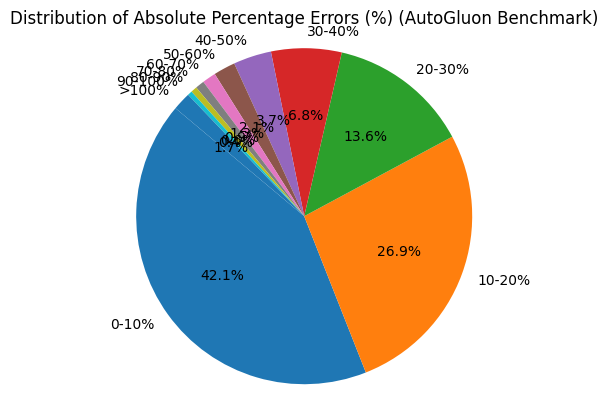

Distribution of Absolute Percentage Errors (AutoGluon Benchmark):
price
0-10%      95645
10-20%     61041
20-30%     30807
30-40%     15388
40-50%      8320
50-60%      4770
60-70%      2987
70-80%      1952
80-90%      1349
90-100%     1005
>100%       3958
Name: count, dtype: int64

Percentage Distribution (AutoGluon Benchmark):
price
0-10%      42.093195
10-20%     26.864036
20-30%     13.558106
30-40%      6.772232
40-50%      3.661617
50-60%      2.099269
60-70%      1.314573
70-80%      0.859072
80-90%      0.593693
90-100%     0.442299
>100%       1.741909
Name: count, dtype: float64


,MAE,RMSE,R2,MAPE
AutoGluon Benchmark,63668,93776,0.8291,0.1958


Kết quả benchmark đã được thêm vào results_df và lưu file CSV!


In [ ]:
# Import thư viện AutoGluon
from autogluon.tabular import TabularPredictor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Chuẩn bị dữ liệu (kết hợp X_train và y_train)
train_data = pd.concat([X_train, y_train], axis=1)
# Remove duplicate 'state' column from the selected columns
selected_cols = ['bed', 'bath', 'house_size', 'zip_prefix', 'price',
                 'zip_suffix', 'city', 'status', 'state', 'year', 'month']
train_data_selected = train_data[selected_cols].copy()

# Huấn luyện mô hình AutoGluon (benchmark tự động)
# Sử dụng eval_metric='mean_absolute_error' để phù hợp với dự đoán giá nhà
# presets='medium_quality' để nhanh (có thể thay bằng 'best_quality' cho hiệu suất cao hơn)
# time_limit=1800 giây (30 phút) - điều chỉnh nếu dữ liệu lớn
predictor = TabularPredictor(
    label='price',  # Tên cột target
    eval_metric='mean_absolute_error',  # Tối ưu MAE tốt hơn MAPE
    path='autogluon_model'  # Thư mục lưu model
).fit(
    train_data=train_data_selected,
    presets='medium_quality',  # Tự động thử RF, XGBoost, LightGBM, Neural Nets
    time_limit=1800  # Giới hạn thời gian để tránh chạy lâu
)

print("Mô hình benchmark AutoGluon đã huấn luyện hoàn tất!")

# Dự đoán trên tập test (X_test)
y_pred_auto = predictor.predict(X_test)

# Đánh giá các chỉ số (giống các mô hình thủ công trong notebook)
mae_auto = mean_absolute_error(y_test, y_pred_auto)
rmse_auto = np.sqrt(mean_squared_error(y_test, y_pred_auto))
r2_auto = r2_score(y_test, y_pred_auto)
mape_auto = mean_absolute_percentage_error(y_test, y_pred_auto)

print("Đánh giá mô hình benchmark AutoGluon:")
print(f"MAE: {mae_auto:,.0f}")
print(f"RMSE: {rmse_auto:,.0f}")
print(f"R2: {r2_auto:.4f}")
print(f"MAPE: {mape_auto:.4f}")

# Vẽ phân phối lỗi phần trăm tuyệt đối (APE) - sao chép hàm từ notebook
def plot_percentage_error_distribution(model_name, y_test, y_pred):
    error_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
    error_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%', '>100%']
    y_test_cleaned = y_test.replace(0, 1e-6)
    percentage_errors = np.abs((y_test - y_pred) / y_test_cleaned) * 100
    error_categories = pd.cut(percentage_errors, bins=error_bins, labels=error_labels, right=True, include_lowest=True)
    error_counts = error_categories.value_counts().sort_index()
    error_percentages = error_counts / error_counts.sum() * 100
    plt.pie(error_percentages, labels=error_percentages.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Absolute Percentage Errors (%) ({model_name})')
    plt.axis('equal')
    plt.show()
    print(f"Distribution of Absolute Percentage Errors ({model_name}):")
    print(error_counts)
    print(f"\nPercentage Distribution ({model_name}):")
    print(error_percentages)

plot_percentage_error_distribution('AutoGluon Benchmark', y_test, y_pred_auto)

# Tích hợp vào results_df (từ phần tổng hợp đánh giá trong notebook)
# Khởi tạo results nếu nó chưa tồn tại
if 'results' not in locals() and 'results' not in globals():
    results = {}

results['AutoGluon Benchmark'] = {
    'MAE': mae_auto,
    'RMSE': rmse_auto,
    'R2': r2_auto,
    'MAPE': mape_auto
}
# Create results_df if it doesn't exist or update it
if 'results_df' not in locals() and 'results_df' not in globals():
    results_df = pd.DataFrame(results).T
else:
    results_df.loc['AutoGluon Benchmark'] = results['AutoGluon Benchmark']

results_df['MAE'] = results_df['MAE'].map('{:.0f}'.format)
results_df['RMSE'] = results_df['RMSE'].map('{:.0f}'.format)
results_df['R2'] = results_df['R2'].map('{:.4f}'.format)
results_df['MAPE'] = results_df['MAPE'].map('{:.4f}'.format)
display(results_df)
results_df.to_csv('model_evaluation_results_with_autogluon.csv', index=True)

print("Kết quả benchmark đã được thêm vào results_df và lưu file CSV!")

In [ ]:
predictor.leaderboard(silent=True)

,model,score_val,eval_metric,pred_time_val,fit_time,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,WeightedEnsemble_L2,-9.092723e+09,mean_squared_error,80.731945,1648.130851,0.001227,0.041540,2,True,5
1,LightGBM,-9.258799e+09,mean_squared_error,38.534932,332.254164,38.534932,332.254164,1,True,2
2,LightGBMXT,-9.270595e+09,mean_squared_error,41.702688,430.620687,41.702688,430.620687,1,True,1
3,RandomForestMSE,-1.216863e+10,mean_squared_error,0.493097,885.214461,0.493097,885.214461,1,True,3
4,CatBoost,-1.676451e+10,mean_squared_error,0.021577,41.535366,0.021577,41.535366,1,True,4


In [ ]:
# Dự đoán trên tập huấn luyện (X_train)
y_pred_auto_train = predictor.predict(X_train)

# Đánh giá mô hình trên tập huấn luyện
mae_auto_train = mean_absolute_error(y_train, y_pred_auto_train)
rmse_auto_train = np.sqrt(mean_squared_error(y_train, y_pred_auto_train))
r2_auto_train = r2_score(y_train, y_pred_auto_train)
mape_auto_train = mean_absolute_percentage_error(y_train, y_pred_auto_train)

print("Đánh giá mô hình benchmark AutoGluon trên tập huấn luyện:")
print(f"MAE: {mae_auto_train:,.0f}")
print(f"RMSE: {rmse_auto_train:,.0f}")
print(f"R2: {r2_auto_train:.4f}")
print(f"MAPE: {mape_auto_train:.4f}")

print("\nĐánh giá mô hình benchmark AutoGluon trên tập kiểm tra (đã chạy trước đó):")
print(f"MAE: {mae_auto:,.0f}")
print(f"RMSE: {rmse_auto:,.0f}")
print(f"R2: {r2_auto:.4f}")
print(f"MAPE: {mape_auto:.4f}")

In [ ]:
# Kết hợp X_test và y_test thành một DataFrame duy nhất
X_test_with_y = X_test.copy()
X_test_with_y['price'] = y_test

# Lấy tầm quan trọng của các đặc trưng
# Sử dụng DataFrame kết hợp để tính trên tập kiểm tra
feature_importances = predictor.feature_importance(data=X_test_with_y)

print("Tầm quan trọng của các đặc trưng trong mô hình AutoGluon:")
display(feature_importances)

These features in provided data are not utilized by the predictor and will be ignored: ['brokered_by', 'acre_lot', 'street', 'zip_code', 'prev_sold_date', 'quarter', 'bed_bath_difference', 'price_per_sqft', 'price_per_acre', 'median_price_per_sqft_by_zip_code', 'mean_price_per_sqft_by_zip_code', 'median_price_per_sqft_by_city', 'mean_price_per_sqft_by_city']
Computing feature importance via permutation shuffling for 10 features using 5000 rows with 5 shuffle sets...
	3329.28s	= Expected runtime (665.86s per shuffle set)
	2626.53s	= Actual runtime (Completed 5 of 5 shuffle sets)


Tầm quan trọng của các đặc trưng trong mô hình AutoGluon:


,importance,stddev,p_value,n,p99_high,p99_low
house_size,72032.527143,1422.087231,1.821990e-08,5,74960.624407,69104.429878
state,66714.414941,2367.425867,1.899675e-07,5,71588.977523,61839.852359
zip_prefix,55469.839550,2253.972065,3.264316e-07,5,60110.799185,50828.879914
zip_suffix,14500.643102,636.707453,4.449143e-07,5,15811.632548,13189.653656
city,12266.594940,497.090804,3.229072e-07,5,13290.111776,11243.078105
bath,10977.918558,524.206546,6.220020e-07,5,12057.267081,9898.570034
bed,6933.841861,412.708182,1.499026e-06,5,7783.613711,6084.070011
status,2894.675621,280.980419,1.052082e-05,5,3473.218188,2316.133055
year,1307.356218,200.158587,6.392190e-05,5,1719.485516,895.226921
month,601.515001,62.406911,1.370625e-05,5,730.011693,473.018308


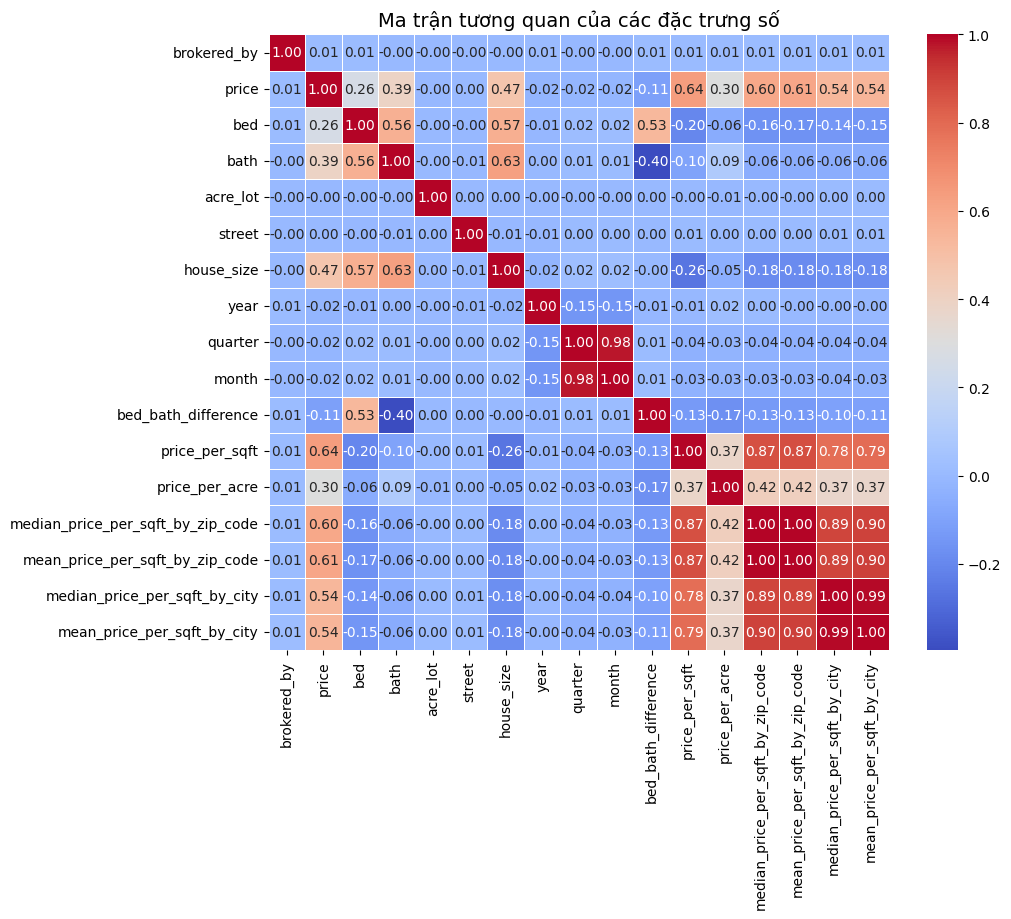

In [ ]:
# Chọn các cột số để tính ma trận tương quan
# Loại bỏ các cột không phải số hoặc không cần thiết cho phân tích tương quan
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Loại bỏ cột target 'price' và các cột có thể gây rò rỉ dữ liệu hoặc không phù hợp
# Dựa trên các cột đã tạo và ý nghĩa của chúng
cols_to_exclude = ['brokered_by', 'street', 'prev_sold_date', 'year', 'quarter', 'month', # Các cột gốc có thể không cần hoặc đã được xử lý/kết hợp
                   'zip_prefix', 'zip_suffix', # Các phần của zip code
                   'median_price_per_sqft_by_zip_code', 'mean_price_per_sqft_by_zip_code',
                   'median_price_per_sqft_by_city', 'mean_price_per_sqft_by_city', # Các đặc trưng tổng hợp theo vị trí
                   'price_per_sqft', 'price_per_acre', # Các đặc trưng được tạo ra từ price
                   'bed_bath_difference' # Đặc trưng được tạo ra
                  ]

# Lọc ra các cột số cuối cùng để tính tương quan
final_numerical_cols = [col for col in numerical_cols if col not in cols_to_exclude]

# Tính ma trận tương quan
correlation_matrix = df[numerical_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Ma trận tương quan của các đặc trưng số', fontsize=14)
plt.show()

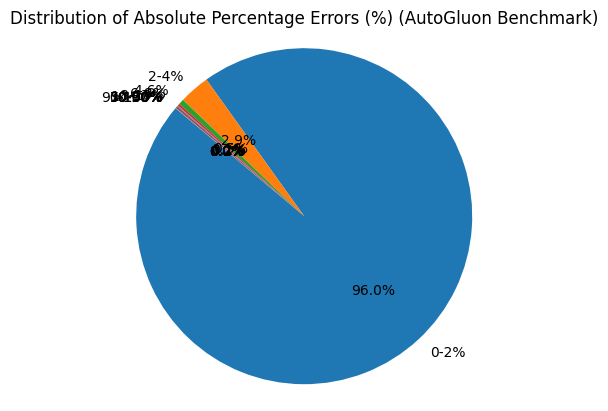

Distribution of Absolute Percentage Errors (AutoGluon Benchmark):
price
0-2%       218132
2-4%         6685
4-6%         1182
6-8%          434
8-10%         215
10-30%        491
30-50%         58
50-70%         16
70-90%          6
90-100%         1
>100%           2
Name: count, dtype: int64

Percentage Distribution (AutoGluon Benchmark):
price
0-2%       95.999507
2-4%        2.942057
4-6%        0.520196
6-8%        0.191003
8-10%       0.094621
10-30%      0.216088
30-50%      0.025526
50-70%      0.007042
70-90%      0.002641
90-100%     0.000440
>100%       0.000880
Name: count, dtype: float64


NameError: name 'results' is not defined

In [ ]:
def plot_percentage_error_distribution(model_name, y_test, y_pred):
    error_bins = [0,2,4,6,8, 10, 30, 50, 70, 90, 100, np.inf]
    error_labels = ['0-2%', '2-4%', '4-6%', '6-8%', '8-10%', '10-30%', '30-50%', '50-70%', '70-90%', '90-100%', '>100%']
    y_test_cleaned = y_test.replace(0, 1e-6)
    percentage_errors = np.abs((y_test - y_pred) / y_test_cleaned) * 100
    error_categories = pd.cut(percentage_errors, bins=error_bins, labels=error_labels, right=True, include_lowest=True)
    error_counts = error_categories.value_counts().sort_index()
    error_percentages = error_counts / error_counts.sum() * 100
    plt.pie(error_percentages, labels=error_percentages.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Absolute Percentage Errors (%) ({model_name})')
    plt.axis('equal')
    plt.show()
    print(f"Distribution of Absolute Percentage Errors ({model_name}):")
    print(error_counts)
    print(f"\nPercentage Distribution ({model_name}):")
    print(error_percentages)

plot_percentage_error_distribution('AutoGluon Benchmark', y_test, y_pred_auto)



# Model

## Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Create the Linear Regression model pipeline
# We combine the preprocessor with the Linear Regression model
model_lr = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                           ('regressor', LinearRegression())])

# Train the model
model_lr.fit(X_train, y_train)

print("Linear Regression model trained successfully.")


Linear Regression model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_lr = model_lr.predict(X_test)

# Evaluate the model
mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)
mape_lr = mean_absolute_percentage_error(y_test, y_pred_lr)

print(f"Linear Regression Model Evaluation:")
print(f"Linear Regression Model MAPE: {mape_lr}")
print(f"Linear Regression Model MAE: {mae_lr:.2f}")
print(f"Linear Regression Model RMSE: {rmse_lr:.2f}")
print(f"Linear Regression Model R2: {r2_lr:.4f}")

Linear Regression Model Evaluation:
Linear Regression Model MAPE: 0.49913458699510227
Linear Regression Model MAE: 144489.65
Linear Regression Model RMSE: 188136.93
Linear Regression Model R2: 0.3121


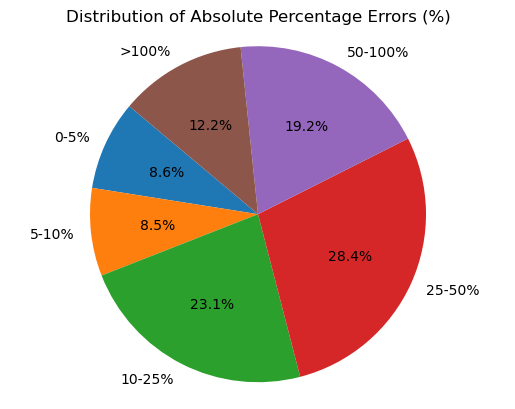

Distribution of Absolute Percentage Errors:
price
0-5%       19552
5-10%      19209
10-25%     52478
25-50%     64510
50-100%    43673
>100%      27800
Name: count, dtype: int64

Percentage Distribution:
price
0-5%        8.604801
5-10%       8.453847
10-25%     23.095475
25-50%     28.390737
50-100%    19.220410
>100%      12.234731
Name: count, dtype: float64


In [ ]:
# Define error bins
error_bins = [0, 5, 10, 25, 50, 100, np.inf] # Define the upper bounds of the bins, including infinity for the last bin
error_labels = ['0-5%', '5-10%', '10-25%', '25-50%', '50-100%', '>100%'] # Labels for the bins
y_test_cleaned = y_test.replace(0, 1e-6) # Replace 0 prices with a very small number
percentage_errors = np.abs((y_test - y_pred_lr) / y_test_cleaned) * 100

# Categorize percentage errors into bins
error_categories = pd.cut(percentage_errors, bins=error_bins, labels=error_labels, right=True, include_lowest=True)

# Count the number of errors in each category
error_counts = error_categories.value_counts().sort_index()

# Calculate the percentage for each category
error_percentages = error_counts / error_counts.sum() * 100

# Create a pie chart
plt.pie(error_percentages, labels=error_percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Absolute Percentage Errors (%)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Display the counts and percentages
print("Distribution of Absolute Percentage Errors:")
print(error_counts)
print("\nPercentage Distribution:")
print(error_percentages)

## Random Forest

In [ ]:
# Create the Random Forest model pipeline
# We combine the preprocessor with the Random Forest Regressor model
model_rf = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                           ('regressor', RandomForestRegressor(n_estimators=100,
                                                               random_state=42, n_jobs=-1))])

# Train the model
model_rf.fit(X_train, y_train)

print("Random Forest model trained successfully.")

Random Forest model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_rf = model_rf.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)
mape_rf = mean_absolute_percentage_error(y_test, y_pred_rf)

print(f"Random Forest Model Evaluation:")
print(f"Random Forest Model MAPE: {mape_rf}")
print(f"Random Forest Model MAE: {mae_rf:.2f}")
print(f"Random Forest Model RMSE: {rmse_rf:.2f}")
print(f"Random Forest Model R2: {r2_rf:.4f}")

Random Forest Model Evaluation:
Random Forest Model MAPE: 0.20293404254977188
Random Forest Model MAE: 65544.22
Random Forest Model RMSE: 97882.89
Random Forest Model R2: 0.8138


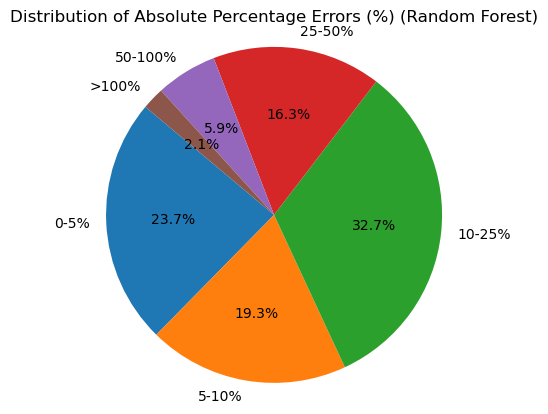

Distribution of Absolute Percentage Errors (Random Forest):
price
0-5%       53964
5-10%      43827
10-25%     74223
25-50%     36945
50-100%    13400
>100%       4863
Name: count, dtype: int64

Percentage Distribution (Random Forest):
price
0-5%       23.749461
5-10%      19.288185
10-25%     32.665411
25-50%     16.259429
50-100%     5.897316
>100%       2.140198
Name: count, dtype: float64


In [ ]:
# Define error bins
error_bins = [0, 5, 10, 25, 50, 100, np.inf] # Define the upper bounds of the bins, including infinity for the last bin
error_labels = ['0-5%', '5-10%', '10-25%', '25-50%', '50-100%', '>100%'] # Labels for the bins
y_test_cleaned = y_test.replace(0, 1e-6) # Replace 0 prices with a very small number
percentage_errors_rf = np.abs((y_test - y_pred_rf) / y_test_cleaned) * 100

# Categorize percentage errors into bins
error_categories_rf = pd.cut(percentage_errors_rf, bins=error_bins, labels=error_labels, right=True, include_lowest=True)

# Count the number of errors in each category
error_counts_rf = error_categories_rf.value_counts().sort_index()

# Calculate the percentage for each category
error_percentages_rf = error_counts_rf / error_counts_rf.sum() * 100

# Create a pie chart
plt.pie(error_percentages_rf, labels=error_percentages_rf.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Absolute Percentage Errors (%) (Random Forest)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Display the counts and percentages
print("Distribution of Absolute Percentage Errors (Random Forest):")
print(error_counts_rf)
print("\nPercentage Distribution (Random Forest):")
print(error_percentages_rf)

In [ ]:
# Create the Random Forest model pipeline
# We combine the preprocessor with the Random Forest Regressor model
model_rf_v2 = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                           ('regressor', RandomForestRegressor(n_estimators=100,criterion='absolute_error',
                                                                random_state=42, n_jobs=-1, max_depth=20, max_features='log2'))])

# Train the model
model_rf_v2.fit(X_train, y_train)

print("Random Forest model trained successfully.")

In [ ]:
# Make predictions on the test set
y_pred_rf_v2 = model_rf_v2.predict(X_test)

# Evaluate the model
mae_rf_v2 = mean_absolute_error(y_test, y_pred_rf_v2)
rmse_rf_v2 = np.sqrt(mean_squared_error(y_test, y_pred_rf_v2))
r2_rf_v2 = r2_score(y_test, y_pred_rf_v2)
mape_rf_v2 = mean_absolute_percentage_error(y_test, y_pred_rf_v2)

print(f"Random Forest Model Evaluation:")
print(f"Random Forest Model MAPE: {mape_rf_v2}")
print(f"Random Forest Model MAE: {mae_rf_v2:.2f}")
print(f"Random Forest Model RMSE: {rmse_rf_v2:.2f}")
print(f"Random Forest Model R2: {r2_rf_v2:.4f}")

Random Forest Model Evaluation:
Random Forest Model MAPE: 0.23354816197396921
Random Forest Model MAE: 73369.74
Random Forest Model RMSE: 105613.81
Random Forest Model R2: 0.7832


## XGBoost

In [ ]:
import xgboost as xgb

# Create the XGBoost model pipeline
# We combine the preprocessor with the XGBoost Regressor model
model_xgb = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                            ('regressor', xgb.XGBRegressor(objective='reg:squarederror',
                                                            n_estimators=100,
                                                            learning_rate=0.1,
                                                            max_depth=5,
                                                            random_state=42,
                                                            n_jobs=-1))])

# Train the model
model_xgb.fit(X_train, y_train)

print("XGBoost model trained successfully.")

XGBoost model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
r2_xgb = r2_score(y_test, y_pred_xgb)
mape_xgb = mean_absolute_percentage_error(y_test, y_pred_xgb)

print(f"XGBoost Model Evaluation:")
print(f"XGBoost Model MAPE: {mape_xgb}")
print(f"XGBoost Model MAE: {mae_xgb:.2f}")
print(f"XGBoost Model RMSE: {rmse_xgb:.2f}")
print(f"XGBoost Model R2: {r2_xgb:.4f}")

XGBoost Model Evaluation:
XGBoost Model MAPE: 0.3004540410033961
XGBoost Model MAE: 94169.90
XGBoost Model RMSE: 130247.75
XGBoost Model R2: 0.6703


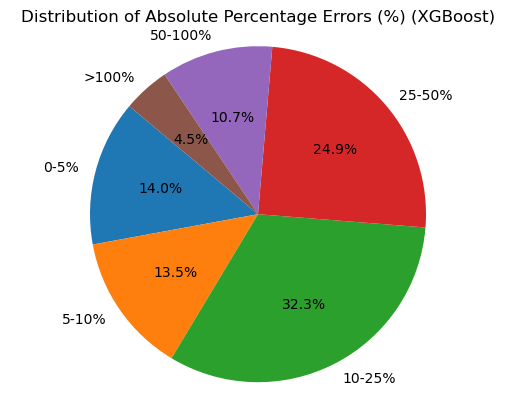

Distribution of Absolute Percentage Errors (XGBoost):
price
0-5%       31818
5-10%      30687
10-25%     73486
25-50%     56582
50-100%    24410
>100%      10239
Name: count, dtype: int64

Percentage Distribution (XGBoost):
price
0-5%       14.003045
5-10%      13.505294
10-25%     32.341059
25-50%     24.901638
50-100%    10.742798
>100%       4.506166
Name: count, dtype: float64


In [ ]:
# Define error bins
error_bins = [0, 5, 10, 25, 50, 100, np.inf] # Define the upper bounds of the bins, including infinity for the last bin
error_labels = ['0-5%', '5-10%', '10-25%', '25-50%', '50-100%', '>100%'] # Labels for the bins
y_test_cleaned = y_test.replace(0, 1e-6) # Replace 0 prices with a very small number
percentage_errors_xgb = np.abs((y_test - y_pred_xgb) / y_test_cleaned) * 100

# Categorize percentage errors into bins
error_categories_xgb = pd.cut(percentage_errors_xgb, bins=error_bins, labels=error_labels, right=True, include_lowest=True)

# Count the number of errors in each category
error_counts_xgb = error_categories_xgb.value_counts().sort_index()

# Calculate the percentage for each category
error_percentages_xgb = error_counts_xgb / error_counts_xgb.sum() * 100

# Create a pie chart
plt.pie(error_percentages_xgb, labels=error_percentages_xgb.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Absolute Percentage Errors (%) (XGBoost)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Display the counts and percentages
print("Distribution of Absolute Percentage Errors (XGBoost):")
print(error_counts_xgb)
print("\nPercentage Distribution (XGBoost):")
print(error_percentages_xgb)

In [ ]:
import xgboost as xgb

# Create the XGBoost model pipeline
# We combine the preprocessor with the XGBoost Regressor model
model_xgb_mae = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                            ('regressor', xgb.XGBRegressor(objective='reg:absoluteerror',
                                                            n_estimators=100,
                                                            learning_rate=0.1,
                                                            max_depth=5,
                                                            random_state=42,
                                                            n_jobs=-1))])

# Train the model
model_xgb_mae.fit(X_train, y_train)

print("XGBoost model trained successfully.")

XGBoost model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_xgb_mae = model_xgb_mae.predict(X_test)

# Evaluate the model
mae_xgb_mae = mean_absolute_error(y_test, y_pred_xgb_mae)
rmse_xgb_mae = np.sqrt(mean_squared_error(y_test, y_pred_xgb_mae))
r2_xgb_mae = r2_score(y_test, y_pred_xgb_mae)
mape_xgb_mae = mean_absolute_percentage_error(y_test, y_pred_xgb_mae)

print(f"XGBoost Model Evaluation:")
print(f"XGBoost Model MAPE: {mape_xgb_mae}")
print(f"XGBoost Model MAE: {mae_xgb_mae:.2f}")
print(f"XGBoost Model RMSE: {rmse_xgb_mae:.2f}")
print(f"XGBoost Model R2: {r2_xgb_mae:.4f}")

XGBoost Model Evaluation:
XGBoost Model MAPE: 0.27723280990043236
XGBoost Model MAE: 93885.35
XGBoost Model RMSE: 135079.71
XGBoost Model R2: 0.6454


In [ ]:
# Make predictions on the test set
y_pred_xgb_mae_train = model_xgb_mae.predict(X_train)

# Evaluate the model
mae_xgb_mae_train = mean_absolute_error(y_train, y_pred_xgb_mae_train)
rmse_xgb_mae_train = np.sqrt(mean_squared_error(y_train, y_pred_xgb_mae_train))
r2_xgb_mae_train = r2_score(y_train, y_pred_xgb_mae_train)
mape_xgb_mae_train = mean_absolute_percentage_error(y_train, y_pred_xgb_mae_train)

print(f"XGBoost Model Evaluation:")
print(f"XGBoost Model MAPE: {mape_xgb_mae_train}")
print(f"XGBoost Model MAE: {mae_xgb_mae_train:.2f}")
print(f"XGBoost Model RMSE: {rmse_xgb_mae_train:.2f}")
print(f"XGBoost Model R2: {r2_xgb_mae_train:.4f}")

XGBoost Model Evaluation:
XGBoost Model MAPE: 0.2764946875461663
XGBoost Model MAE: 93704.56
XGBoost Model RMSE: 135131.63
XGBoost Model R2: 0.6438


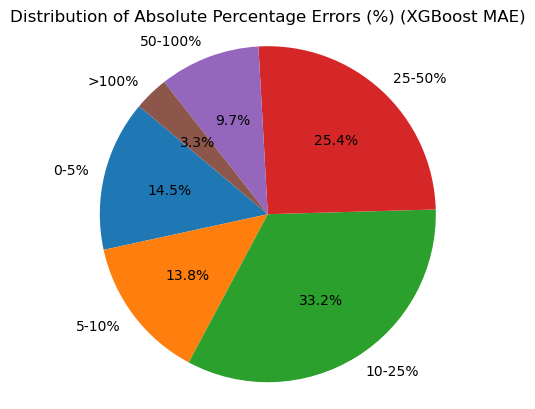

Distribution of Absolute Percentage Errors (XGBoost MAE):
price
0-5%       32981
5-10%      31355
10-25%     75541
25-50%     57812
50-100%    22021
>100%       7512
Name: count, dtype: int64

Percentage Distribution (XGBoost MAE):
price
0-5%       14.514880
5-10%      13.799280
10-25%     33.245460
25-50%     25.442959
50-100%     9.691403
>100%       3.306018
Name: count, dtype: float64


In [ ]:
# Define error bins
error_bins = [0, 5, 10, 25, 50, 100, np.inf] # Define the upper bounds of the bins, including infinity for the last bin
error_labels = ['0-5%', '5-10%', '10-25%', '25-50%', '50-100%', '>100%'] # Labels for the bins
y_test_cleaned = y_test.replace(0, 1e-6) # Replace 0 prices with a very small number
percentage_errors_xgb_mae = np.abs((y_test - y_pred_xgb_mae) / y_test_cleaned) * 100

# Categorize percentage errors into bins
error_categories_xgb_mae = pd.cut(percentage_errors_xgb_mae, bins=error_bins, labels=error_labels, right=True, include_lowest=True)

# Count the number of errors in each category
error_counts_xgb_mae = error_categories_xgb_mae.value_counts().sort_index()

# Calculate the percentage for each category
error_percentages_xgb_mae = error_counts_xgb_mae / error_counts_xgb_mae.sum() * 100

# Create a pie chart
plt.pie(error_percentages_xgb_mae, labels=error_percentages_xgb_mae.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Absolute Percentage Errors (%) (XGBoost MAE)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Display the counts and percentages
print("Distribution of Absolute Percentage Errors (XGBoost MAE):")
print(error_counts_xgb_mae)
print("\nPercentage Distribution (XGBoost MAE):")
print(error_percentages_xgb_mae)

## LightGBM

In [ ]:
!pip install lightgbm

In [ ]:
import lightgbm as lgb

# Create the LightGBM model pipeline
# We combine the preprocessor with the LightGBM Regressor model
model_lgb = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                             ('regressor', lgb.LGBMRegressor(random_state=42, n_jobs=-1))])

# Train the model
model_lgb.fit(X_train, y_train)

print("LightGBM model trained successfully.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1236
[LightGBM] [Info] Number of data points in the train set: 908888, number of used features: 9
[LightGBM] [Info] Start training from score 402232.774785
LightGBM model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_lgb = model_lgb.predict(X_test)

# Evaluate the model
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
r2_lgb = r2_score(y_test, y_pred_lgb)
mape_lgb = mean_absolute_percentage_error(y_test, y_pred_lgb)

print(f"LightGBM Model Evaluation:")
print(f"LightGBM Model MAPE: {mape_lgb}")
print(f"LightGBM Model MAE: {mae_lgb:.2f}")
print(f"LightGBM Model RMSE: {rmse_lgb:.2f}")
print(f"LightGBM Model R2: {r2_lgb:.4f}")

LightGBM Model Evaluation:
LightGBM Model MAPE: 0.28694788674757205
LightGBM Model MAE: 89986.60
LightGBM Model RMSE: 125123.52
LightGBM Model R2: 0.6957


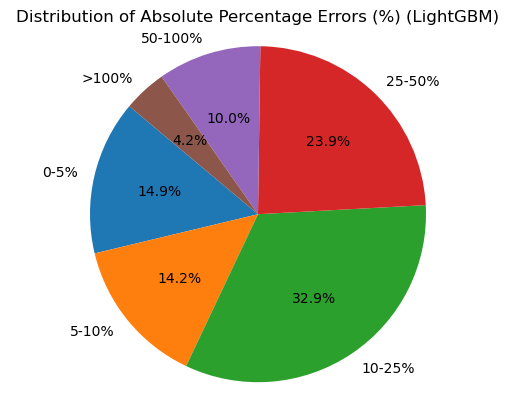

Distribution of Absolute Percentage Errors (LightGBM):
price
0-5%       33769
5-10%      32297
10-25%     74747
25-50%     54343
50-100%    22623
>100%       9443
Name: count, dtype: int64

Percentage Distribution (LightGBM):
price
0-5%       14.861677
5-10%      14.213853
10-25%     32.896022
25-50%     23.916258
50-100%     9.956342
>100%       4.155848
Name: count, dtype: float64


In [ ]:
# Define error bins
error_bins = [0, 5, 10, 25, 50, 100, np.inf] # Define the upper bounds of the bins, including infinity for the last bin
error_labels = ['0-5%', '5-10%', '10-25%', '25-50%', '50-100%', '>100%'] # Labels for the bins
y_test_cleaned = y_test.replace(0, 1e-6) # Replace 0 prices with a very small number
percentage_errors_lgb = np.abs((y_test - y_pred_lgb) / y_test_cleaned) * 100

# Categorize percentage errors into bins
error_categories_lgb = pd.cut(percentage_errors_lgb, bins=error_bins, labels=error_labels, right=True, include_lowest=True)

# Count the number of errors in each category
error_counts_lgb = error_categories_lgb.value_counts().sort_index()

# Calculate the percentage for each category
error_percentages_lgb = error_counts_lgb / error_counts_lgb.sum() * 100

# Create a pie chart
plt.pie(error_percentages_lgb, labels=error_percentages_lgb.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Absolute Percentage Errors (%) (LightGBM)')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Display the counts and percentages
print("Distribution of Absolute Percentage Errors (LightGBM):")
print(error_counts_lgb)
print("\nPercentage Distribution (LightGBM):")
print(error_percentages_lgb)

In [ ]:
model_lgb_mae = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                             ('regressor', lgb.LGBMRegressor(objective='regression_l1',random_state=42, n_jobs=-1))])

# Train the model
model_lgb_mae.fit(X_train, y_train)

print("LightGBM model trained successfully.")

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006755 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1236
[LightGBM] [Info] Number of data points in the train set: 908888, number of used features: 9
[LightGBM] [Info] Start training from score 350000.000000
LightGBM model trained successfully.


In [ ]:
# Make predictions on the test set
y_pred_lgb_mae = model_lgb_mae.predict(X_test)

# Evaluate the model
mae_lgb_mae = mean_absolute_error(y_test, y_pred_lgb_mae)
rmse_lgb_mae = np.sqrt(mean_squared_error(y_test, y_pred_lgb_mae))
r2_lgb_mae = r2_score(y_test, y_pred_lgb_mae)
mape_lgb_mae = mean_absolute_percentage_error(y_test, y_pred_lgb_mae)

print(f"LightGBM Model Evaluation:")
print(f"LightGBM Model MAPE: {mape_lgb_mae}")
print(f"LightGBM Model MAE: {mae_lgb_mae:.2f}")
print(f"LightGBM Model RMSE: {rmse_lgb_mae:.2f}")
print(f"LightGBM Model R2: {r2_lgb_mae:.4f}")

LightGBM Model Evaluation:
LightGBM Model MAPE: 0.2648682741397096
LightGBM Model MAE: 89256.38
LightGBM Model RMSE: 129019.59
LightGBM Model R2: 0.6765


In [ ]:
# Make predictions on the test set
y_pred_train_lgb_mae = model_lgb_mae.predict(X_train)

# Evaluate the model
mae_lgb_mae_train = mean_absolute_error(y_train, y_pred_train_lgb_mae)
rmse_lgb_mae_train = np.sqrt(mean_squared_error(y_train, y_pred_train_lgb_mae))
r2_lgb_mae_train = r2_score(y_train, y_pred_train_lgb_mae)
mape_lgb_mae_train = mean_absolute_percentage_error(y_train, y_pred_train_lgb_mae)

print(f"LightGBM Model Evaluation:")
print(f"LightGBM Model MAPE: {mape_lgb_mae_train}")
print(f"LightGBM Model MAE: {mae_lgb_mae_train:.2f}")
print(f"LightGBM Model RMSE: {rmse_lgb_mae_train:.2f}")
print(f"LightGBM Model R2: {r2_lgb_mae_train:.4f}")

LightGBM Model Evaluation:
LightGBM Model MAPE: 0.26412523960218487
LightGBM Model MAE: 89092.25
LightGBM Model RMSE: 129048.83
LightGBM Model R2: 0.6751


In [ ]:
def plot_percentage_error_distribution(model_name, y_test, y_pred):
    # Define error bins
    error_bins = [0, 5, 10, 25, 50, 100, np.inf]
    error_labels = ['0-5%', '5-10%', '10-25%', '25-50%', '50-100%', '>100%']
    y_test_cleaned = y_test.replace(0, 1e-6) # Replace 0 prices with a very small number
    percentage_errors = np.abs((y_test - y_pred) / y_test_cleaned) * 100

    # Categorize percentage errors into bins
    error_categories = pd.cut(percentage_errors, bins=error_bins, labels=error_labels, right=True, include_lowest=True)

    # Count the number of errors in each category
    error_counts = error_categories.value_counts().sort_index()

    # Calculate the percentage for each category
    error_percentages = error_counts / error_counts.sum() * 100

    # Create a pie chart
    plt.pie(error_percentages, labels=error_percentages.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Absolute Percentage Errors (%) ({model_name})')
    plt.axis('equal')
    plt.show()

    # Display the counts and percentages
    print(f"Distribution of Absolute Percentage Errors ({model_name}):")
    print(error_counts)
    print(f"\nPercentage Distribution ({model_name}):")
    print(error_percentages)

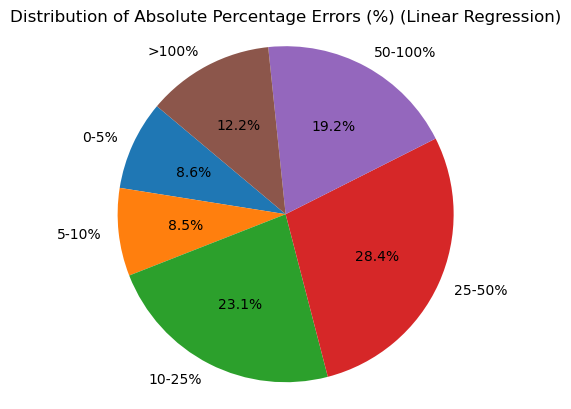

Distribution of Absolute Percentage Errors (Linear Regression):
price
0-5%       19552
5-10%      19209
10-25%     52478
25-50%     64510
50-100%    43673
>100%      27800
Name: count, dtype: int64

Percentage Distribution (Linear Regression):
price
0-5%        8.604801
5-10%       8.453847
10-25%     23.095475
25-50%     28.390737
50-100%    19.220410
>100%      12.234731
Name: count, dtype: float64


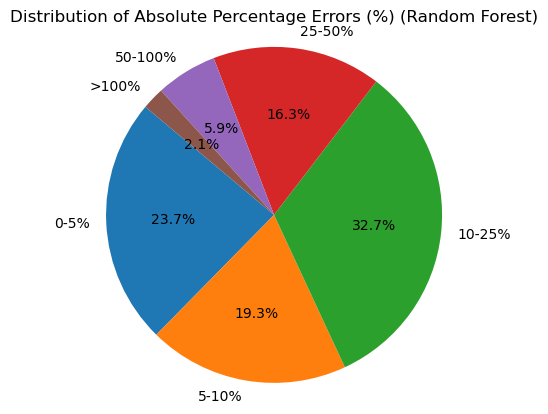

Distribution of Absolute Percentage Errors (Random Forest):
price
0-5%       53964
5-10%      43827
10-25%     74223
25-50%     36945
50-100%    13400
>100%       4863
Name: count, dtype: int64

Percentage Distribution (Random Forest):
price
0-5%       23.749461
5-10%      19.288185
10-25%     32.665411
25-50%     16.259429
50-100%     5.897316
>100%       2.140198
Name: count, dtype: float64


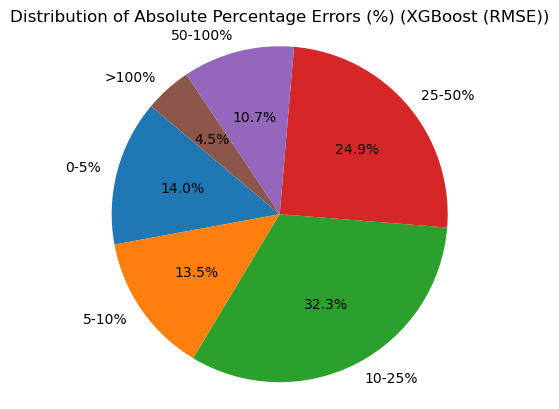

Distribution of Absolute Percentage Errors (XGBoost (RMSE)):
price
0-5%       31818
5-10%      30687
10-25%     73486
25-50%     56582
50-100%    24410
>100%      10239
Name: count, dtype: int64

Percentage Distribution (XGBoost (RMSE)):
price
0-5%       14.003045
5-10%      13.505294
10-25%     32.341059
25-50%     24.901638
50-100%    10.742798
>100%       4.506166
Name: count, dtype: float64


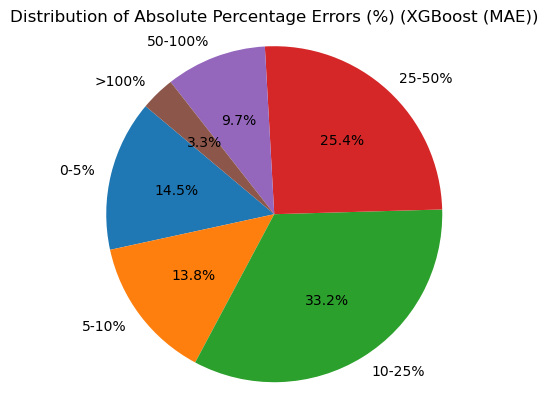

Distribution of Absolute Percentage Errors (XGBoost (MAE)):
price
0-5%       32981
5-10%      31355
10-25%     75541
25-50%     57812
50-100%    22021
>100%       7512
Name: count, dtype: int64

Percentage Distribution (XGBoost (MAE)):
price
0-5%       14.514880
5-10%      13.799280
10-25%     33.245460
25-50%     25.442959
50-100%     9.691403
>100%       3.306018
Name: count, dtype: float64


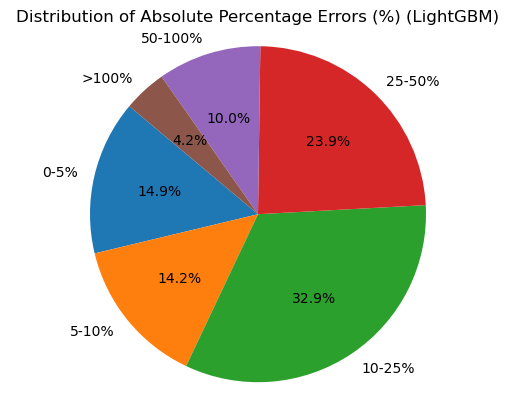

Distribution of Absolute Percentage Errors (LightGBM):
price
0-5%       33769
5-10%      32297
10-25%     74747
25-50%     54343
50-100%    22623
>100%       9443
Name: count, dtype: int64

Percentage Distribution (LightGBM):
price
0-5%       14.861677
5-10%      14.213853
10-25%     32.896022
25-50%     23.916258
50-100%     9.956342
>100%       4.155848
Name: count, dtype: float64


In [ ]:
# Example usage with the existing models:
plot_percentage_error_distribution('Linear Regression', y_test, y_pred_lr)
plot_percentage_error_distribution('Random Forest', y_test, y_pred_rf)
plot_percentage_error_distribution('XGBoost (RMSE)', y_test, y_pred_xgb)
plot_percentage_error_distribution('XGBoost (MAE)', y_test, y_pred_xgb_mae)
plot_percentage_error_distribution('LightGBM', y_test, y_pred_lgb)

## CatBoost

In [ ]:
!pip install catboost

In [ ]:
from catboost import CatBoostRegressor

# Create a pipeline including preprocessing and CatBoost model
# Explicitly setting the loss_function to 'RMSE' (Root Mean Squared Error)
catboost_pipeline = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                                    ('model', CatBoostRegressor(iterations=100, learning_rate=0.1, random_state=42, verbose=0))])

# Train the model
print("Training the CatBoost model...")
catboost_pipeline.fit(X_train, y_train)
print("CatBoost model training complete.")

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred_catboost = catboost_pipeline.predict(X_test)
print("Predictions complete.")

Training the CatBoost model...
CatBoost model training complete.
Making predictions on the test set...
Predictions complete.


In [ ]:
# Evaluate the model
rmse_catboost = np.sqrt(mean_squared_error(y_test, y_pred_catboost))
mae_catboost = mean_absolute_error(y_test, y_pred_catboost)
r2_catboost = r2_score(y_test, y_pred_catboost)
mape_catboost = mean_absolute_percentage_error(y_test, y_pred_catboost)
print("CatBoost Model Evaluation:")
print(f"CatBoost Model MAPE: {mape_catboost}")
print(f"Root Mean Squared Error (RMSE): {rmse_catboost}")
print(f"Mean Absolute Error (MAE): {mae_catboost}")
print(f"R-squared (R2): {r2_catboost}")

CatBoost Model Evaluation:
CatBoost Model MAPE: 0.32021506435482555
Root Mean Squared Error (RMSE): 136717.51188946603
Mean Absolute Error (MAE): 99720.06062442856
R-squared (R2): 0.6367164271583416


In [ ]:
catboost_pipeline_mae = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                                    ('model', CatBoostRegressor(loss_function='MAE', iterations=100, learning_rate=0.1, random_state=42, verbose=0))])

# Train the model
print("Training the CatBoost model...")
catboost_pipeline_mae.fit(X_train, y_train)
print("CatBoost model training complete.")

# Make predictions on the test set
print("Making predictions on the test set...")
y_pred_catboost_mae = catboost_pipeline_mae.predict(X_test)
print("Predictions complete.")

Training the CatBoost model...
CatBoost model training complete.
Making predictions on the test set...
Predictions complete.


In [ ]:
# Evaluate the model
rmse_catboost_mae = np.sqrt(mean_squared_error(y_test, y_pred_catboost_mae))
mae_catboost_mae = mean_absolute_error(y_test, y_pred_catboost_mae)
r2_catboost_mae = r2_score(y_test, y_pred_catboost_mae)
mape_catboost_mae = mean_absolute_percentage_error(y_test, y_pred_catboost_mae)
print("CatBoost Model Evaluation:")
print(f"CatBoost Model MAPE: {mape_catboost_mae}")
print(f"Root Mean Squared Error (RMSE): {rmse_catboost_mae}")
print(f"Mean Absolute Error (MAE): {mae_catboost_mae}")
print(f"R-squared (R2): {r2_catboost_mae}")

CatBoost Model Evaluation:
CatBoost Model MAPE: 0.2909041134479936
Root Mean Squared Error (RMSE): 140706.14467325422
Mean Absolute Error (MAE): 98470.4343013282
R-squared (R2): 0.6152101611072951


## Custom RMSE

In [ ]:
# Sử dụng y_train để tính trọng số cho tập huấn luyện
weights = 1.0 / np.maximum(y_train, 1e-6) # Đảm bảo không chia cho 0

# Tạo mô hình CatBoost với custom objective và eval_metric
# Sử dụng cùng preprocessor đã định nghĩa trước đó
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline

# Create a pipeline including preprocessing and CatBoost model
model_catboost_custom_rmse = Pipeline(steps=[('preprocessor', preprocessor_target_encoded),
                                             ('model', CatBoostRegressor(iterations=100, learning_rate=0.3, random_state=42,
                                                                          verbose=0, loss_function='RMSE', bootstrap_type='No'))])


# Huấn luyện mô hình
print("Training the CatBoost model with custom RMSE...")
model_catboost_custom_rmse.fit(X_train, y_train, model__sample_weight=weights)

print("Mô hình CatBoost (Custom RMSE) đã được huấn luyện.")

Training the CatBoost model with custom RMSE...
Mô hình CatBoost (Custom RMSE) đã được huấn luyện.


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

# Dự đoán trên tập kiểm tra
y_pred_catboost_custom_rmse = model_catboost_custom_rmse.predict(X_test)

# Đánh giá mô hình
mae_catboost_custom_rmse = mean_absolute_error(y_test, y_pred_catboost_custom_rmse)
rmse_catboost_custom_rmse = np.sqrt(mean_squared_error(y_test, y_pred_catboost_custom_rmse))
r2_catboost_custom_rmse = r2_score(y_test, y_pred_catboost_custom_rmse)
mape_catboost_custom_rmse = mean_absolute_percentage_error(y_test, y_pred_catboost_custom_rmse)

print(f"Đánh giá mô hình CatBoost (Loss Function: Custom RMSE):")
print(f"MAE: {mae_catboost_custom_rmse:,.0f}")
print(f"RMSE: {rmse_catboost_custom_rmse:,.0f}")
print(f"R2: {r2_catboost_custom_rmse:.4f}")
print(f"MAPE: {mape_catboost_custom_rmse:.4f}")

Đánh giá mô hình CatBoost (Loss Function: Custom RMSE):
MAE: 91,923
RMSE: 134,001
R2: 0.6510
MAPE: 0.2491


In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Apply preprocessing to X_train and X_test
# Use the preprocessor defined earlier in the notebook
X_train_processed = preprocessor_target_encoded.transform(X_train)
X_test_processed = preprocessor_target_encoded.transform(X_test)

# Tạo DMatrix cho XGBoost với sample_weight
weights = 1.0 / np.maximum(y_train, 1e-6)
dtrain = xgb.DMatrix(X_train_processed, label=y_train, weight=weights)
dtest = xgb.DMatrix(X_test_processed, label=y_test)

# Tham số
params = {
    'objective': 'reg:squarederror',
    'learning_rate': 0.3,
    'max_depth': 6,
    'seed': 42
}

# Train
print("Training the XGBoost model with custom RMSE")
model_xgb_custom_rmse = xgb.train(params, dtrain, num_boost_round=100)
print("XGBoost model with custom RMSE trained.")

# Dự đoán trên tập kiểm tra
y_pred_xgb_custom_rmse = model_xgb_custom_rmse.predict(dtest)

mae_xgb_custom_rmse = mean_absolute_error(y_test, y_pred_xgb_custom_rmse)
rmse_xgb_custom_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb_custom_rmse))
r2_xgb_custom_rmse = r2_score(y_test, y_pred_xgb_custom_rmse)
mape_xgb_custom_rmse = mean_absolute_percentage_error(y_test, y_pred_xgb_custom_rmse)

print("\nĐánh giá mô hình XGBoost (Loss Function: Custom RMSE):")
print(f"MAE: {mae_xgb_custom_rmse:,.0f}")
print(f"RMSE: {rmse_xgb_custom_rmse:,.0f}")
print(f"R2: {r2_xgb_custom_rmse:.4f}")
print(f"MAPE: {mape_xgb_custom_rmse:.4f}")

Training the XGBoost model with custom RMSE
XGBoost model with custom RMSE trained.

Đánh giá mô hình XGBoost (Loss Function: Custom RMSE):
MAE: 150,910
RMSE: 213,104
R2: 0.1174
MAPE: 0.3922


In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error

weights = 1.0 / np.maximum(y_train, 1e-6)
train_set = lgb.Dataset(X_train_processed, label=y_train, weight=weights)
test_set = lgb.Dataset(X_test_processed, label=y_test)

# Tham số
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'learning_rate': 0.3,
    'verbosity': -1,
    'seed': 42
}

# Train
print("Training the LightGBM model with custom RMSE...")
model_lgb_custom_rmse = lgb.train(params, train_set, num_boost_round=100)
print("LightGBM model with custom RMSE trained.")

# Dự đoán trên tập kiểm tra
y_pred_lgb_custom_rmse = model_lgb_custom_rmse.predict(X_test_processed)

# Đánh giá mô hình (sử dụng các hàm đánh giá từ sklearn)
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
import numpy as np

mae_lgb_custom_rmse = mean_absolute_error(y_test, y_pred_lgb_custom_rmse)
rmse_lgb_custom_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lgb_custom_rmse))
r2_lgb_custom_rmse = r2_score(y_test, y_pred_lgb_custom_rmse)
mape_lgb_custom_rmse = mean_absolute_percentage_error(y_test, y_pred_lgb_custom_rmse)


print("\nĐánh giá mô hình LightGBM (Loss Function: Custom RMSE):")
print(f"MAE: {mae_lgb_custom_rmse:,.0f}")
print(f"RMSE: {rmse_lgb_custom_rmse:,.0f}")
print(f"R2: {r2_lgb_custom_rmse:.4f}")
print(f"MAPE: {mape_lgb_custom_rmse:.4f}")

Training the LightGBM model with custom RMSE...
LightGBM model with custom RMSE trained.

Đánh giá mô hình LightGBM (Loss Function: Custom RMSE):
MAE: 84,844
RMSE: 124,511
R2: 0.6987
MAPE: 0.2312


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error
import numpy as np

ape = np.abs((y_test - y_pred_lgb_custom_rmse) / y_test) * 100  # % lỗi từng mẫu
print("MAPE sklearn:", mean_absolute_percentage_error(y_test, y_pred_lgb_custom_rmse))
print("MAPE manual :", np.mean(ape))


MAPE sklearn: 0.23123763572797287
MAPE manual : 23.123763572797294


In [ ]:
y_pred_lgb_custom_rmse_train = model_lgb_custom_rmse.predict(X_train_processed)

mae_lgb_custom_rmse_train = mean_absolute_error(y_train, y_pred_lgb_custom_rmse_train)
rmse_lgb_custom_rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_lgb_custom_rmse_train))
r2_lgb_custom_rmse_train = r2_score(y_train, y_pred_lgb_custom_rmse_train)
mape_lgb_custom_rmse_train = mean_absolute_percentage_error(y_train, y_pred_lgb_custom_rmse_train)


print("\nĐánh giá tập train mô hình LightGBM (Loss Function: Custom RMSE):")
print(f"MAE: {mae_lgb_custom_rmse_train:,.0f}")
print(f"RMSE: {rmse_lgb_custom_rmse_train:,.0f}")
print(f"R2: {r2_lgb_custom_rmse_train:.4f}")
print(f"MAPE: {mape_lgb_custom_rmse_train:.4f}")


Đánh giá tập train mô hình LightGBM (Loss Function: Custom RMSE):
MAE: 84,555
RMSE: 124,244
R2: 0.6989
MAPE: 0.2302


In [ ]:
# Gather the evaluation results from the different models
results = {
    'Linear Regression': {'MAE': mae_lr,'RMSE': rmse_lr,'R2': r2_lr,'MAPE': mape_lr},

    'Random Forest': {'MAE': mae_rf,'RMSE': rmse_rf,'R2': r2_rf,'MAPE': mape_rf},

    'Random Forest MAE': {'MAE': mae_rf_v2,'RMSE': rmse_rf_v2,'R2': r2_rf_v2,'MAPE': mape_rf_v2},

    'XGBoost RMSE': {'MAE': mae_xgb,'RMSE': rmse_xgb,'R2': r2_xgb,'MAPE': mape_xgb},

    'CatBoost RMSE': {'MAE': mae_catboost,'RMSE': rmse_catboost,'R2': r2_catboost,'MAPE': mape_catboost},

    'LightGBM RMSE': {'MAE': mae_lgb,'RMSE': rmse_lgb,'R2': r2_lgb,'MAPE': mape_lgb},

    'XGBoost MAE': {'MAE': mae_xgb_mae,'RMSE': rmse_xgb_mae,'R2': r2_xgb_mae,'MAPE': mape_xgb_mae},

    'CatBoost MAE': {'MAE': mae_catboost_mae,'RMSE': rmse_catboost_mae,'R2': r2_catboost_mae,'MAPE': mape_catboost_mae},

    'LightGBM MAE': {'MAE': mae_lgb_mae,'RMSE': rmse_lgb_mae,'R2': r2_lgb_mae,'MAPE': mape_lgb_mae},

    'CatBoost Custom RMSE': {'MAE': mae_catboost_custom_rmse,'RMSE': rmse_catboost_custom_rmse,'R2': r2_catboost_custom_rmse,'MAPE': mape_catboost_custom_rmse},

    'XGBoost Custom RMSE': {'MAE': mae_xgb_custom_rmse,'RMSE': rmse_xgb_custom_rmse,'R2': r2_xgb_custom_rmse,'MAPE': mape_xgb_custom_rmse},

    'LightGBM Custom RMSE': {'MAE': mae_lgb_custom_rmse,'RMSE': rmse_lgb_custom_rmse,'R2': r2_lgb_custom_rmse,'MAPE': mape_lgb_custom_rmse}
}

# Create a pandas DataFrame from the results
results_df = pd.DataFrame(results).T

# Format the numeric columns for better readability
results_df['MAE'] = results_df['MAE'].map('{:,.0f}'.format)
results_df['RMSE'] = results_df['RMSE'].map('{:,.0f}'.format)
results_df['R2'] = results_df['R2'].map('{:.4f}'.format)
results_df['MAPE'] = results_df['MAPE'].map('{:.4f}'.format)


# Display the table
print("Summary of Model Evaluation Metrics:")
display(results_df)

Summary of Model Evaluation Metrics:


,MAE,RMSE,R2,MAPE
Linear Regression,"144,490","188,137",0.3121,0.4991
Random Forest,"65,544","97,883",0.8138,0.2029
XGBoost RMSE,"94,170","130,248",0.6703,0.3005
CatBoost RMSE,"99,720","136,718",0.6367,0.3202
LightGBM RMSE,"89,987","125,124",0.6957,0.2869
XGBoost MAE,"93,885","135,080",0.6454,0.2772
CatBoost MAE,"98,470","140,706",0.6152,0.2909
LightGBM MAE,"89,256","129,020",0.6765,0.2649
CatBoost Custom RMSE,"91,923","134,001",0.6510,0.2491
XGBoost Custom RMSE,"150,910","213,104",0.1174,0.3922


In [ ]:
results_df.to_csv('model_evaluation_results.csv')


In [ ]:
def plot_percentage_error_distribution(model_name, y_test, y_pred):
    # Define error bins
    #error_bins = [0, 5, 10, 25, 50, 100, np.inf]
    #error_labels = ['0-5%', '5-10%', '10-25%', '25-50%', '50-100%', '>100%']
    error_bins = [0,10,20,30,40,50,60,70,80,90,100, np.inf]
    error_labels = ['0-10%', '10-20%', '20-30%', '30-40%', '40-50%', '50-60%', '60-70%', '70-80%', '80-90%', '90-100%', '>100%']

    y_test_cleaned = y_test.replace(0, 1e-6) # Replace 0 prices with a very small number
    percentage_errors = np.abs((y_test - y_pred) / y_test_cleaned) * 100

    # Categorize percentage errors into bins
    error_categories = pd.cut(percentage_errors, bins=error_bins, labels=error_labels, right=True, include_lowest=True)

    # Count the number of errors in each category
    error_counts = error_categories.value_counts().sort_index()

    # Calculate the percentage for each category
    error_percentages = error_counts / error_counts.sum() * 100

    # Create a pie chart
    plt.pie(error_percentages, labels=error_percentages.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Distribution of Absolute Percentage Errors (%) ({model_name})')
    plt.axis('equal')
    plt.show()

    # Display the counts and percentages
    print(f"Distribution of Absolute Percentage Errors ({model_name}):")
    print(error_counts)
    print(f"\nPercentage Distribution ({model_name}):")
    print(error_percentages)

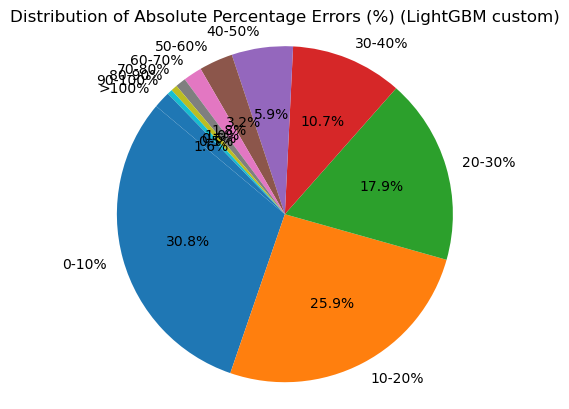

Distribution of Absolute Percentage Errors (LightGBM custom):
price
0-10%      70091
10-20%     58828
20-30%     40574
30-40%     24398
40-50%     13399
50-60%      7381
60-70%      4091
70-80%      2271
80-90%      1393
90-100%     1122
>100%       3674
Name: count, dtype: int64

Percentage Distribution (LightGBM custom):
price
0-10%      30.846925
10-20%     25.890099
20-30%     17.856546
30-40%     10.737517
40-50%      5.896876
50-60%      3.248365
60-70%      1.800442
70-80%      0.999463
80-90%      0.613057
90-100%     0.493790
>100%       1.616921
Name: count, dtype: float64


In [ ]:
plot_percentage_error_distribution('LightGBM custom', y_test, y_pred_lgb_custom_rmse)


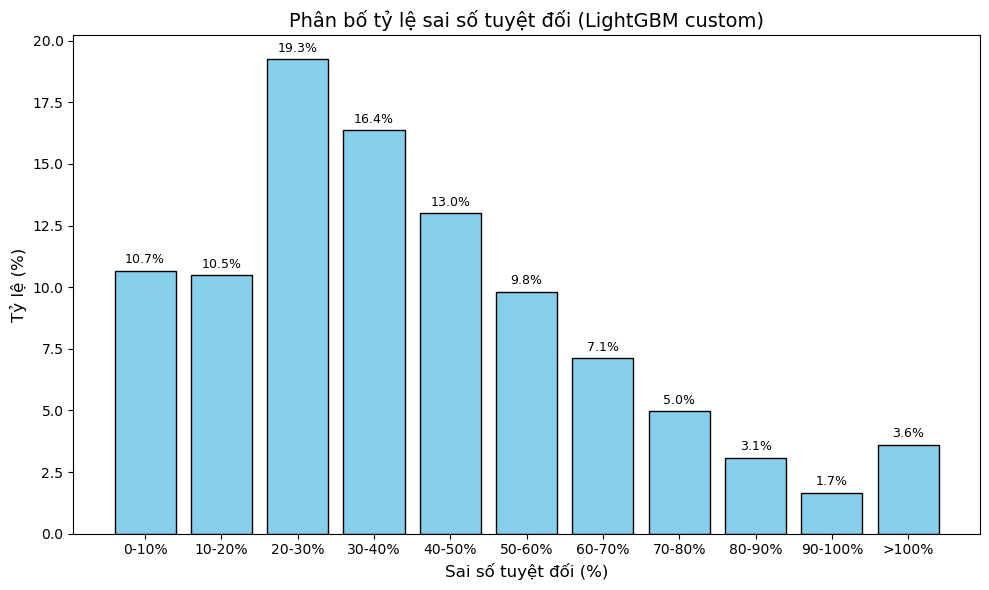

In [ ]:
import matplotlib.pyplot as plt

# Dữ liệu phân khúc sai số
bins = ["0-10%", "10-20%", "20-30%", "30-40%", "40-50%",
        "50-60%", "60-70%", "70-80%", "80-90%", "90-100%", ">100%"]

counts = [26472, 26018, 47807, 40618, 32282,
          24386, 17654, 12354, 7646, 4124, 8957]

percentages = [10.660524, 10.477694, 19.252330, 16.357252, 13.000266,
               9.820472, 7.109432, 4.975072, 3.079116, 1.660774, 3.607068]

# Vẽ bar chart theo % phân bố
plt.figure(figsize=(10,6))
plt.bar(bins, percentages, color="skyblue", edgecolor="black")

# Thêm nhãn
plt.xlabel("Sai số tuyệt đối (%)", fontsize=12)
plt.ylabel("Tỷ lệ (%)", fontsize=12)
plt.title("Phân bố tỷ lệ sai số tuyệt đối (LightGBM custom)", fontsize=14)

# Hiển thị giá trị trên đầu cột
for i, v in enumerate(percentages):
    plt.text(i, v + 0.3, f"{v:.1f}%", ha="center", fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Giả sử y_test và y_pred_lgb_custom_rmse có dạng numpy array hoặc pandas Series
# Nếu y_test là numpy array thì chuyển sang Series
y_test_series = pd.Series(y_test, name="Actual")
y_pred_series = pd.Series(y_pred_lgb_custom_rmse, name="Predicted")

# Ghép lại thành DataFrame
results = pd.concat([y_test_series.reset_index(drop=True),
                     y_pred_series.reset_index(drop=True)], axis=1)

# Lưu ra file CSV
results.to_csv("test_predictions.csv", index=False, encoding="utf-8-sig")

print("✅ Đã lưu file test_predictions.csv")


✅ Đã lưu file test_predictions.csv


In [ ]:
df['price'].describe()

count    1.136110e+06
mean     4.023102e+05
std      2.264893e+05
min      3.000000e+04
25%      2.300000e+05
50%      3.500000e+05
75%      5.250000e+05
max      1.147131e+06
Name: price, dtype: float64

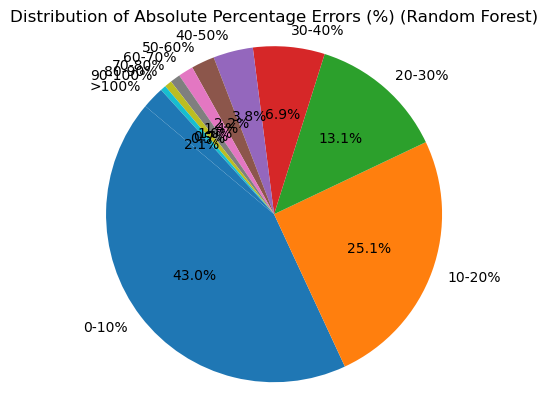

Distribution of Absolute Percentage Errors (Random Forest):
price
0-10%      97791
10-20%     57101
20-30%     29708
30-40%     15654
40-50%      8705
50-60%      5100
60-70%      3286
70-80%      2214
80-90%      1591
90-100%     1209
>100%       4863
Name: count, dtype: int64

Percentage Distribution (Random Forest):
price
0-10%      43.037646
10-20%     25.130049
20-30%     13.074438
30-40%      6.889298
40-50%      3.831055
50-60%      2.244501
60-70%      1.446163
70-80%      0.974377
80-90%      0.700196
90-100%     0.532079
>100%       2.140198
Name: count, dtype: float64


In [ ]:
plot_percentage_error_distribution('Random Forest', y_test, y_pred_rf)

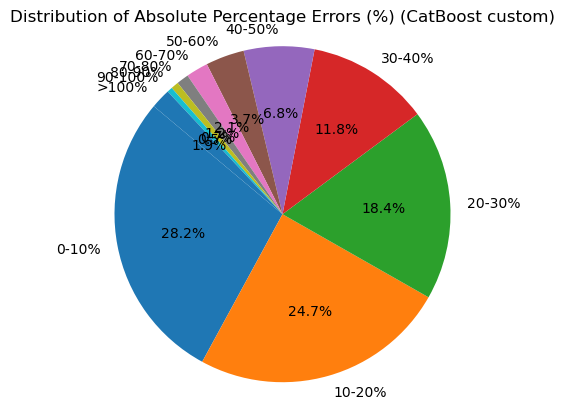

Distribution of Absolute Percentage Errors (CatBoost custom):
price
0-10%      64032
10-20%     56120
20-30%     41783
30-40%     26769
40-50%     15420
50-60%      8435
60-70%      4835
70-80%      2650
80-90%      1662
90-100%     1166
>100%       4350
Name: count, dtype: int64

Percentage Distribution (CatBoost custom):
price
0-10%      28.180370
10-20%     24.698313
20-30%     18.388624
30-40%     11.780990
40-50%      6.786315
50-60%      3.712229
60-70%      2.127875
70-80%      1.166260
80-90%      0.731443
90-100%     0.513155
>100%       1.914427
Name: count, dtype: float64


In [ ]:
plot_percentage_error_distribution('CatBoost custom', y_test, y_pred_catboost_custom_rmse)


In [ ]:
# Calculate mean, median, and standard deviation of 'price_per_sqft' by 'zip_code'
price_per_sqft_stats_by_zipcode = df.groupby('zip_code')['price_per_sqft'].agg(['mean', 'median', 'std']).reset_index()
display(price_per_sqft_stats_by_zipcode.head(20))
len(price_per_sqft_stats_by_zipcode)

,zip_code,mean,median,std
0,00602,238.590909,238.590909,NaN
1,00603,59.011590,59.011590,6.115186
2,00612,261.617585,260.330579,80.001758
3,00623,174.886138,158.737794,42.176816
4,00637,80.136991,80.136991,29.519036
5,00641,92.715232,92.715232,NaN
6,00646,321.052632,321.052632,NaN
7,00653,79.166667,79.166667,NaN
8,00659,126.787417,126.787417,NaN
9,00662,73.529412,73.529412,NaN


24460

In [ ]:
# Define thresholds (adjust as needed)
mean_median_diff_threshold_percentage = 10  # Percentage of mean
std_to_mean_ratio_threshold = 0.3

# Calculate the absolute difference between mean and median
price_per_sqft_stats_by_zipcode['mean_median_diff'] = abs(price_per_sqft_stats_by_zipcode['mean'] - price_per_sqft_stats_by_zipcode['median'])

# Calculate the ratio of standard deviation to mean
# Handle potential division by zero if mean is 0 or very close to 0
price_per_sqft_stats_by_zipcode['std_to_mean_ratio'] = price_per_sqft_stats_by_zipcode['std'] / price_per_sqft_stats_by_zipcode['mean'].replace(0, 1e-9)


# Filter zip codes based on the criteria
# Ensure 'mean' is not NaN for the percentage calculation
filtered_zip_codes = price_per_sqft_stats_by_zipcode[
    (price_per_sqft_stats_by_zipcode['mean_median_diff'] <= (price_per_sqft_stats_by_zipcode['mean'] * mean_median_diff_threshold_percentage / 100)) &
    (price_per_sqft_stats_by_zipcode['std_to_mean_ratio'] <= std_to_mean_ratio_threshold)
].copy() # Use .copy() to avoid SettingWithCopyWarning

print(f"Số lượng mã ZIP có mean và median xấp xỉ ({mean_median_diff_threshold_percentage}%) và tỷ lệ std/mean thấp ({std_to_mean_ratio_threshold}): {len(filtered_zip_codes)}")
print("\nDanh sách các mã ZIP thỏa mãn điều kiện:")
display(filtered_zip_codes.head())

Số lượng mã ZIP có mean và median xấp xỉ (10%) và tỷ lệ std/mean thấp (0.3): 12161

Danh sách các mã ZIP thỏa mãn điều kiện:


,zip_code,mean,median,std,mean_median_diff,std_to_mean_ratio
1,00603,59.011590,59.011590,6.115186,0.000000,0.103627
3,00623,174.886138,158.737794,42.176816,16.148344,0.241167
13,00680,89.799493,87.983755,21.654166,1.815738,0.241139
16,00692,103.174242,109.615385,22.006556,6.441143,0.213295
17,00693,112.668650,113.696225,27.326887,1.027575,0.242542


In [ ]:
# Sort the DataFrame by 'std' in descending order to find zip codes with high standard deviation
zip_codes_high_std = price_per_sqft_stats_by_zipcode.sort_values(by='std', ascending=False)
display(zip_codes_high_std.head(20))

,zip_code,mean,median,std,mean_median_diff,std_to_mean_ratio
9497,37356,469.968482,469.968482,510.508326,0.000000,1.086261
12121,48096,458.164428,260.390625,474.816600,197.773803,1.036345
20551,80532,577.905928,577.905928,458.425709,0.000000,0.793253
1063,05463,388.115928,170.994610,437.462470,217.121318,1.127144
829,03856,543.440346,543.440346,432.682682,0.000000,0.796192
20559,80544,669.625083,669.625083,411.305919,0.000000,0.614233
1939,10012,705.535682,705.535682,401.063546,0.000000,0.568453
19075,75433,398.098051,201.484524,395.929000,196.613527,0.994551
83,00976,289.766473,126.937984,382.233406,162.828488,1.319108
19410,76432,481.400000,481.400000,379.857763,0.000000,0.789069


In [ ]:
display(df[df['zip_code']=='32034'])

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,...,month,zip_prefix,zip_suffix,bed_bath_difference,price_per_sqft,price_per_acre,median_price_per_sqft_by_zip_code,mean_price_per_sqft_by_zip_code,median_price_per_sqft_by_city,mean_price_per_sqft_by_city
413556,30151.0,for_sale,699000.0,3.0,3.0,0.23,1060434.0,Fernandina Beach,Florida,32034,...,11,320,34,0.0,497.155050,3.039130e+06,251.200447,286.936723,242.91498,279.316914
413558,72051.0,for_sale,499000.0,3.0,2.0,0.09,738510.0,Fernandina Beach,Florida,32034,...,6,320,34,1.0,373.223635,5.544444e+06,251.200447,286.936723,242.91498,279.316914
413559,16776.0,for_sale,979000.0,3.0,3.0,0.24,1810486.0,Fernandina Beach,Florida,32034,...,6,320,34,0.0,375.671527,4.079167e+06,251.200447,286.936723,242.91498,279.316914
413560,88907.0,for_sale,745000.0,5.0,4.0,0.32,1816563.0,Fernandina Beach,Florida,32034,...,10,320,34,1.0,205.801105,2.328125e+06,251.200447,286.936723,242.91498,279.316914
413563,53097.0,for_sale,885000.0,4.0,4.0,0.53,1809912.0,Fernandina Beach,Florida,32034,...,10,320,34,0.0,279.444269,1.669811e+06,251.200447,286.936723,242.91498,279.316914
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1672970,29212.0,sold,422990.0,3.0,2.0,NaN,1812379.0,Fernandina Beach,Florida,32034,...,3,320,34,1.0,222.275355,NaN,251.200447,286.936723,242.91498,279.316914
1672976,106249.0,sold,979000.0,3.0,2.0,0.15,1406512.0,Fernandina Beach,Florida,32034,...,3,320,34,1.0,941.346154,6.526667e+06,251.200447,286.936723,242.91498,279.316914
1673005,71068.0,sold,407000.0,3.0,3.0,NaN,1726856.0,Fernandina Beach,Florida,32034,...,4,320,34,0.0,195.297505,NaN,251.200447,286.936723,242.91498,279.316914
1673029,51470.0,sold,285000.0,3.0,2.0,NaN,1810860.0,Fernandina Beach,Florida,32034,...,4,320,34,1.0,246.539792,NaN,251.200447,286.936723,242.91498,279.316914


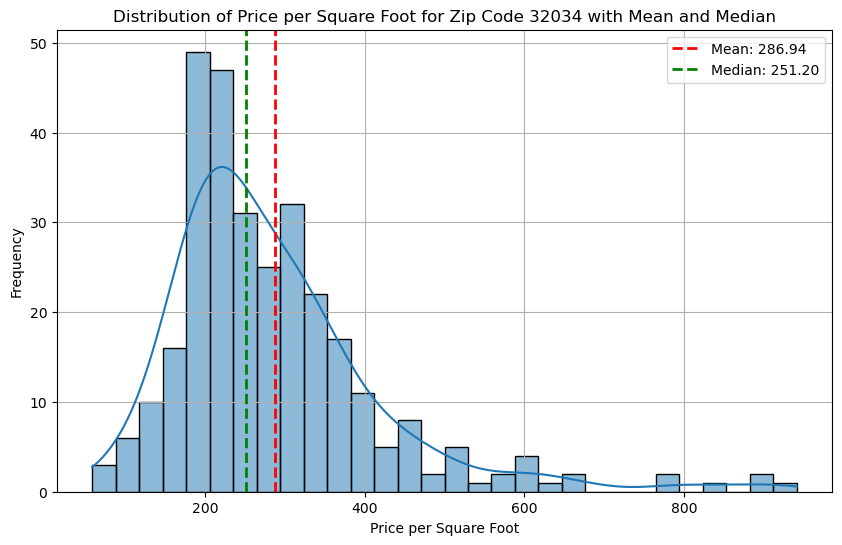

Mean price_per_sqft for 32034: 286.94
Median price_per_sqft for 32034: 251.20
Standard Deviation of price_per_sqft for 32034: 135.35


In [ ]:
# Nhập mã ZIP bạn muốn trực quan hóa
zip_code_to_plot = '32034' # Thay đổi mã ZIP này thành mã bạn muốn xem

# Lọc dữ liệu cho mã ZIP đã chọn
df_zip_code = df[df['zip_code'] == zip_code_to_plot].copy()

# Vẽ biểu đồ histogram cho price_per_sqft trong mã ZIP này
plt.figure(figsize=(10, 6))
sns.histplot(df_zip_code['price_per_sqft'].dropna(), bins=30, kde=True)

# Tính mean và median cho mã ZIP này
mean_price_per_sqft_zip = df_zip_code['price_per_sqft'].mean()
median_price_per_sqft_zip = df_zip_code['price_per_sqft'].median()

# Bổ sung đường thẳng đứng cho mean và median
plt.axvline(mean_price_per_sqft_zip, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_price_per_sqft_zip:.2f}')
plt.axvline(median_price_per_sqft_zip, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_price_per_sqft_zip:.2f}')

plt.title(f'Distribution of Price per Square Foot for Zip Code {zip_code_to_plot} with Mean and Median')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.grid(True)
plt.legend() # Show the legend for the mean and median lines
plt.show()

print(f"Mean price_per_sqft for {zip_code_to_plot}: {mean_price_per_sqft_zip:.2f}")
print(f"Median price_per_sqft for {zip_code_to_plot}: {median_price_per_sqft_zip:.2f}")
print(f"Standard Deviation of price_per_sqft for {zip_code_to_plot}: {df_zip_code['price_per_sqft'].std():.2f}")

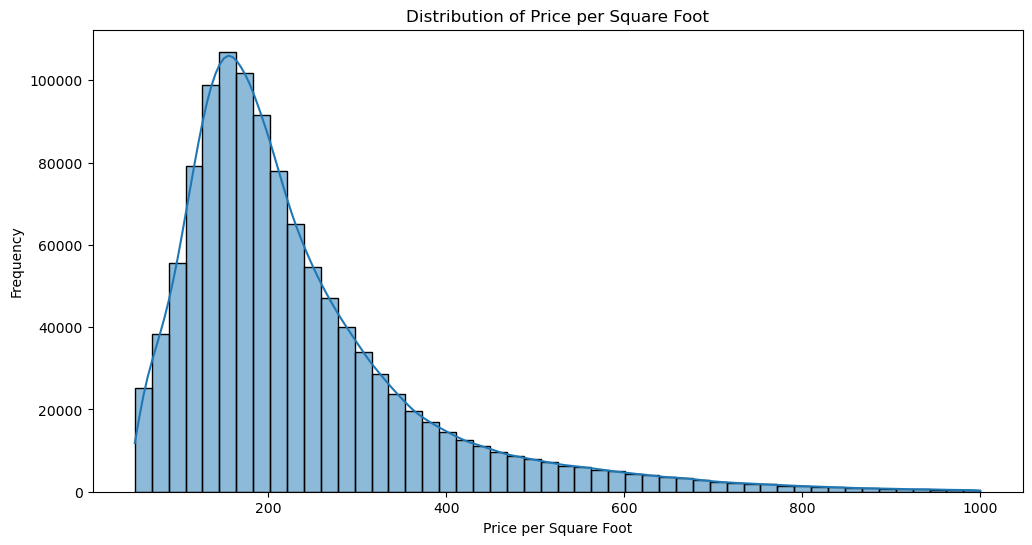

In [ ]:
df['price_per_sqft'] = df['price'] / df['house_size']
plt.figure(figsize=(12, 6))
sns.histplot(df['price_per_sqft'].dropna(), bins=50, kde=True) # Drop NaN values for plotting
plt.title('Distribution of Price per Square Foot')
plt.xlabel('Price per Square Foot')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Tính giá trung bình price_per_sqft theo thành phố, bỏ qua các giá trị NaN
average_price_per_sqft_by_city = df.groupby('city')['price_per_sqft'].mean().reset_index()

# Merge lại với DataFrame ban đầu để lấy thông tin vị trí (latitude, longitude) cho mỗi thành phố
# Chúng ta sẽ sử dụng một cách tiếp cận đơn giản là lấy vị trí của bất kỳ bất động sản nào trong thành phố đó
# để đại diện cho vị trí của thành phố. Cách chính xác hơn là tính trung bình lat/lon của tất cả bds trong thành phố.
city_locations = df.groupby('city')[['latitude', 'longitude']].first().reset_index()

# Gộp dữ liệu giá trung bình và vị trí lại
city_price_data = average_price_per_sqft_by_city.merge(city_locations, on='city', how='left')

# Loại bỏ các hàng có giá trị NaN ở cột price_per_sqft hoặc vị trí
city_price_data.dropna(subset=['price_per_sqft', 'latitude', 'longitude'], inplace=True)

print("Giá trung bình price_per_sqft theo thành phố (đã gộp vị trí):")
display(city_price_data.head())
print("\nSố lượng thành phố sau khi xử lý NaN:", len(city_price_data))

KeyError: "Columns not found: 'latitude', 'longitude'"

In [ ]:
import plotly.express as px

# Tạo bản đồ
fig = px.scatter_mapbox(city_price_data,
                        lat="latitude",
                        lon="longitude",
                        color="price_per_sqft", # Màu sắc dựa trên giá trung bình price_per_sqft
                        size="price_per_sqft", # Kích thước điểm cũng dựa trên giá trung bình price_per_sqft
                        hover_name="city", # Hiển thị tên thành phố khi di chuột qua
                        hover_data={"price_per_sqft": ':.2f'}, # Hiển thị giá trị price_per_sqft khi di chuột qua
                        color_continuous_scale=px.colors.cyclical.IceFire, # Bảng màu
                        size_max=15, # Kích thước tối đa của điểm
                        zoom=6, # Mức độ zoom ban đầu
                        height=600,
                        title='Giá trung bình Price per Square Foot theo Thành phố ở Florida')

fig.update_layout(mapbox_style="open-street-map") # Kiểu bản đồ
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

In [ ]:
# Calculate mean, median, and standard deviation of 'price_per_sqft' by 'city'
price_per_sqft_stats_by_city = df.groupby('city')['price_per_sqft'].agg(['mean', 'median', 'std']).reset_index()
display(price_per_sqft_stats_by_city.head(20))
len(price_per_sqft_stats_by_city)

In [ ]:
# Define thresholds (adjust as needed)
mean_median_diff_threshold_percentage = 10  # Percentage of mean
std_to_mean_ratio_threshold = 0.3

# Calculate the absolute difference between mean and median
price_per_sqft_stats_by_city['mean_median_diff'] = abs(price_per_sqft_stats_by_city['mean'] - price_per_sqft_stats_by_city['median'])

# Calculate the ratio of standard deviation to mean
# Handle potential division by zero if mean is 0 or very close to 0
price_per_sqft_stats_by_city['std_to_mean_ratio'] = price_per_sqft_stats_by_city['std'] / price_per_sqft_stats_by_city['mean'].replace(0, 1e-9)


# Filter zip codes based on the criteria
# Ensure 'mean' is not NaN for the percentage calculation
filtered_city = price_per_sqft_stats_by_city[
    (price_per_sqft_stats_by_city['mean_median_diff'] <= (price_per_sqft_stats_by_city['mean'] * mean_median_diff_threshold_percentage / 100)) &
    (price_per_sqft_stats_by_city['std_to_mean_ratio'] <= std_to_mean_ratio_threshold)
].copy() # Use .copy() to avoid SettingWithCopyWarning

print(f"Số lượng city có mean và median xấp xỉ ({mean_median_diff_threshold_percentage}%) và tỷ lệ std/mean thấp ({std_to_mean_ratio_threshold}): {len(filtered_city)}")
print("\nDanh sách các city thỏa mãn điều kiện:")
display(filtered_city.head())